In [1]:
from load_data import load_data_cleansed
from helpers import *
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR, LinearSVR





In [2]:
price, listings, reviews = load_data_cleansed()

/Users/dmnk/OneDrive - stud.uni-goettingen.de/Dokumente/3. Semester/SeminarDL/DubAir/load_data.py:47: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price = price.str.replace("$","")
/Users/dmnk/OneDrive - stud.uni-goettingen.de/Dokumente/3. Semester/SeminarDL/DubAir/load_data.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings["host_location_country"][fil] = str(i)
/Users/dmnk/OneDrive - stud.uni-goettingen.de/Dokumente/3. Semester/SeminarDL/DubAir/load_data.py:77: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  fil = listings["host_location"].str.contains(i, case = False, na = False)
/Users/dmn

In [3]:
listings.head()

,name,last_scraped,description,neighborhood_overview,host_name,host_since,host_about,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_location_country,bath_number,bath_kind,Bathtub,Bed linens,Breakfast,Cleaning before checkout,Dishwasher,Elevator,Hair dryer,Indoor fireplace,Long term stays allowed,Private entrance,Security cameras on property,Single level home,Special_stuff,TV_number,Outdoor_stuff_number,Baby_friendly,sound_system_number,Oven_available,Stoves_available,Refridgerator_available,Body_soap_available,Garden_backyard_available,Free_parking_number,Paid_parking_number,Children_Entertainment,Workspace,Shampoo_Conditioner_available,Fast_wifi_available,Gym_available,Coffee_machine_available,Dryer_available,Washer_available,Hot_tub_available,Pool_available,Patio_balcony_available,Wifi_available,AC_available,heating_available,Kitchen_available,Safe_available,Water_location
0,cosy comfortable Irish cottage twin,2021-11-08,Our house was built in 1937 when there was ple...,I like our neighbourhood as there is no shorta...,Teresa,2010-08-06,"I am a friendly outgoing Irishwoman ,who love...",3.0,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room in bungalow,Private room,2,1.0,2.0,3,1125,0,0,22,202,227,0,0,2011-08-18,2020-02-08,4.77,4.82,4.72,4.92,4.66,4.82,3,1.82,Ireland,1.5,Shared,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,Cosy Comfortable Irish Cottage 1 Double Bed,2021-11-08,Our Cottage is a charming light filled cottage...,"I love Dundrum and its surrounding areas ,<br ...",Teresa,2010-08-06,"I am a friendly outgoing Irishwoman ,who love...",3.0,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room in bungalow,Private room,2,1.0,1.0,3,21,0,0,21,296,182,0,0,2014-11-24,2020-02-09,4.79,4.85,4.72,4.88,4.66,4.80,3,2.15,Ireland,1.5,Shared,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Friendly Single Room,2021-11-08,Washing can be done at a cost of €5 per load....,Plenty of buses into the city and the area is ...,Margaret,2011-07-01,Used to host students and now I am looking fo...,0.0,Dublin City,53.39027,-6.23547,Private room in residential home,Private room,1,1.0,1.0,2,21,5,17,35,310,313,2,1,2014-05-20,2019-12-21,4.75,4.76,4.72,4.90,4.62,4.74,3,3.44,Ireland,2.0,Shared,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,5.5 miles south of Dublin City :^),2021-11-08,A nice place to relax after the bustle of the ...,"Close to the sea, hill walks and the city - vi...",Robert,2011-07-04,I live here on the third floor of my house. Th...,2.0,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room in townhouse,Private room,6,2.0,4.0,1,12,6,8,31,106,288,4,1,2015-07-18,2020-02-09,4.83,4.87,4.84,4.97,4.77,4.84,2,3.75,Ireland,1.5,Shared,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
5,Pádraig Pearse apt. Kilmainham,2021-11-08,"Don't just visit Dublin, experience Dublin in ...","Enjoy a walk along the grand canal, or just ob...",Grainne,2011-07-07,"I'm Gráinne, originally from Co. Kildare and r...",5.0,Dublin City,53.33744,-6.32363,Entire rental unit,Entire home/apt,5,1.0,3.0,4,365,11,18,41,283,50,7,1,2016-12-04,2017-01-25,4.56,4.86,4.68,4.72,4.

# Data format modification

We will ignore all text columns for now. So filter them out:

In [4]:
text_col = ["name", "host_name", "description", "neighborhood_overview", "host_about"]
listings = listings.drop(text_col, axis = 1)

Facing the NAs of the data, we observe that there are many missing values

In [5]:
na_values = listings.isna().sum().sort_values()
na_values.where(na_values > 100).dropna()

Shampoo_Conditioner_available     121.0
Workspace                         121.0
Children_Entertainment            121.0
sound_system_number               121.0
Free_parking_number               121.0
Garden_backyard_available         121.0
Oven_available                    121.0
Refridgerator_available           121.0
Stoves_available                  121.0
Paid_parking_number               121.0
Body_soap_available               121.0
Pool_available                    121.0
Gym_available                     121.0
Coffee_machine_available          121.0
Dryer_available                   121.0
Washer_available                  121.0
Hot_tub_available                 121.0
Baby_friendly                     121.0
Patio_balcony_available           121.0
Wifi_available                    121.0
AC_available                      121.0
heating_available                 121.0
Kitchen_available                 121.0
Fast_wifi_available               121.0
Outdoor_stuff_number              121.0


All review variables are problematic. Let's drop all of them for now

In [6]:
na_filter = listings.isna().any(axis = 1)
listings = listings[~na_filter]
price = price[~na_filter]
listings = listings.reset_index(drop = True)
listings.head()


,last_scraped,host_since,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_location_country,bath_number,bath_kind,Bathtub,Bed linens,Breakfast,Cleaning before checkout,Dishwasher,Elevator,Hair dryer,Indoor fireplace,Long term stays allowed,Private entrance,Security cameras on property,Single level home,Special_stuff,TV_number,Outdoor_stuff_number,Baby_friendly,sound_system_number,Oven_available,Stoves_available,Refridgerator_available,Body_soap_available,Garden_backyard_available,Free_parking_number,Paid_parking_number,Children_Entertainment,Workspace,Shampoo_Conditioner_available,Fast_wifi_available,Gym_available,Coffee_machine_available,Dryer_available,Washer_available,Hot_tub_available,Pool_available,Patio_balcony_available,Wifi_available,AC_available,heating_available,Kitchen_available,Safe_available,Water_location
0,2021-11-08,2010-08-06,3.0,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room in bungalow,Private room,2,1.0,2.0,3,1125,0,0,22,202,227,0,0,2011-08-18,2020-02-08,4.77,4.82,4.72,4.92,4.66,4.82,3,1.82,Ireland,1.5,Shared,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2021-11-08,2010-08-06,3.0,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room in bungalow,Private room,2,1.0,1.0,3,21,0,0,21,296,182,0,0,2014-11-24,2020-02-09,4.79,4.85,4.72,4.88,4.66,4.80,3,2.15,Ireland,1.5,Shared,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2021-11-08,2011-07-01,0.0,Dublin City,53.39027,-6.23547,Private room in residential home,Private room,1,1.0,1.0,2,21,5,17,35,310,313,2,1,2014-05-20,2019-12-21,4.75,4.76,4.72,4.90,4.62,4.74,3,3.44,Ireland,2.0,Shared,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,2021-11-08,2011-07-04,2.0,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room in townhouse,Private room,6,2.0,4.0,1,12,6,8,31,106,288,4,1,2015-07-18,2020-02-09,4.83,4.87,4.84,4.97,4.77,4.84,2,3.75,Ireland,1.5,Shared,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,2021-11-08,2011-07-07,5.0,Dublin City,53.33744,-6.32363,Entire rental unit,Entire home/apt,5,1.0,3.0,4,365,11,18,41,283,50,7,1,2016-12-04,2017-01-25,4.56,4.86,4.68,4.72,4.30,4.46,5,0.83,Ireland,1.0,Normal,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


## Dates

Now let's deal with the date columns and turn them into numbers which give the difference to the last_scraped date

In [7]:
print(type(listings["last_scraped"][2]))
print(type(pd.to_datetime(listings["last_scraped"])[2]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


we have to turn every string into a datetime object

In [8]:
date_col = ["last_scraped","host_since","first_review", "last_review"]

pd.to_datetime(listings["last_scraped"], yearfirst = True)

0      2021-11-08
1      2021-11-08
2      2021-11-08
3      2021-11-08
4      2021-11-08
          ...    
4908   2021-11-08
4909   2021-11-08
4910   2021-11-08
4911   2021-11-08
4912   2021-11-08
Name: last_scraped, Length: 4913, dtype: datetime64[ns]

In [9]:
date_df = listings.filter(date_col).apply(pd.to_datetime)

In [10]:
date_df.head()

,last_scraped,host_since,first_review,last_review
0,2021-11-08,2010-08-06,2011-08-18,2020-02-08
1,2021-11-08,2010-08-06,2014-11-24,2020-02-09
2,2021-11-08,2011-07-01,2014-05-20,2019-12-21
3,2021-11-08,2011-07-04,2015-07-18,2020-02-09
4,2021-11-08,2011-07-07,2016-12-04,2017-01-25


Now we can calculate the time delta

In [11]:
date_df["last_scraped"]-date_df["first_review"]

0      3735 days
1      2541 days
2      2729 days
3      2305 days
4      1800 days
          ...   
4908     50 days
4909     15 days
4910     34 days
4911     42 days
4912     14 days
Length: 4913, dtype: timedelta64[ns]

In [12]:
listings["host_since"] = date_df["last_scraped"]-date_df["host_since"]
listings["first_review"] = date_df["last_scraped"]-date_df["first_review"]
listings["last_review"] = date_df["last_scraped"]-date_df["last_review"]

In [13]:
listings.filter(date_col).head()

,last_scraped,host_since,first_review,last_review
0,2021-11-08,4112 days,3735 days,639 days
1,2021-11-08,4112 days,2541 days,638 days
2,2021-11-08,3783 days,2729 days,688 days
3,2021-11-08,3780 days,2305 days,638 days
4,2021-11-08,3777 days,1800 days,1748 days


We don't use the last_scraped column any longer

In [14]:
listings = listings.drop("last_scraped", axis = 1)

We have a timedelta object in each cell now. We should convert it into an integer using its attribute .days

In [15]:
date_col = date_col[1:]
for i in date_col:
    listings[i] = pd.Series([j.days for j in list(listings[i])])


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


## Categories

Next we have to create dummies for the categorical variables in order to use them for models like RandomForests, Ridge,...

In [17]:
listings.head()

,host_since,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_location_country,bath_number,bath_kind,Bathtub,Bed linens,Breakfast,Cleaning before checkout,Dishwasher,Elevator,Hair dryer,Indoor fireplace,Long term stays allowed,Private entrance,Security cameras on property,Single level home,Special_stuff,TV_number,Outdoor_stuff_number,Baby_friendly,sound_system_number,Oven_available,Stoves_available,Refridgerator_available,Body_soap_available,Garden_backyard_available,Free_parking_number,Paid_parking_number,Children_Entertainment,Workspace,Shampoo_Conditioner_available,Fast_wifi_available,Gym_available,Coffee_machine_available,Dryer_available,Washer_available,Hot_tub_available,Pool_available,Patio_balcony_available,Wifi_available,AC_available,heating_available,Kitchen_available,Safe_available,Water_location
0,4112,3.0,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room in bungalow,Private room,2,1.0,2.0,3,1125,0,0,22,202,227,0,0,3735,639,4.77,4.82,4.72,4.92,4.66,4.82,3,1.82,Ireland,1.5,Shared,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,4112,3.0,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room in bungalow,Private room,2,1.0,1.0,3,21,0,0,21,296,182,0,0,2541,638,4.79,4.85,4.72,4.88,4.66,4.80,3,2.15,Ireland,1.5,Shared,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3783,0.0,Dublin City,53.39027,-6.23547,Private room in residential home,Private room,1,1.0,1.0,2,21,5,17,35,310,313,2,1,2729,688,4.75,4.76,4.72,4.90,4.62,4.74,3,3.44,Ireland,2.0,Shared,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,3780,2.0,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room in townhouse,Private room,6,2.0,4.0,1,12,6,8,31,106,288,4,1,2305,638,4.83,4.87,4.84,4.97,4.77,4.84,2,3.75,Ireland,1.5,Shared,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,3777,5.0,Dublin City,53.33744,-6.32363,Entire rental unit,Entire home/apt,5,1.0,3.0,4,365,11,18,41,283,50,7,1,1800,1748,4.56,4.86,4.68,4.72,4.30,4.46,5,0.83,Ireland,1.0,Normal,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [20]:
cat_col = ["neighbourhood_cleansed", "property_type", "room_type", "host_location_country", "bath_kind"]


Best approach might be to convert all categories into dummy_variables. Let's see how man categories there are for each variables

In [21]:
for i in cat_col:
    print(listings[i].value_counts())

Dublin City              3737
Dn Laoghaire-Rathdown     525
Fingal                    473
South Dublin              178
Name: neighbourhood_cleansed, dtype: int64
Entire rental unit                     1201
Private room in residential home       1000
Private room in rental unit             880
Entire residential home                 700
Private room in townhouse               193
Entire townhouse                        186
Entire condominium (condo)              182
Private room in condominium (condo)     104
Others                                  104
Private room in bed and breakfast        59
Entire serviced apartment                51
Entire cottage                           40
Entire guest suite                       37
Private room in bungalow                 37
Entire bungalow                          23
Entire guesthouse                        22
Entire loft                              22
Private room in cottage                  16
Entire cabin                             14
P

That looks fine. Let's define a function that sets up the dummies and drops the category column:

In [22]:
def to_dummy_single(df, X, output_name):
    dummies = pd.get_dummies(df[X])
    dummies.columns = output_name + "_" + dummies.columns

    if len(dummies.columns) == 2:
        dummies = dummies[dummies.columns[0]]

    df = df.join(dummies)
    df = df.drop(X, axis = 1)

    return df

def to_dummy(df, X_list, output_names):
    for i in range(len(X_list)):
        df = to_dummy_single(df, X_list[i], output_names[i])
    
    return df



In [23]:
listings = to_dummy(listings, cat_col, cat_col)
listings.head()

,host_since,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bath_number,Bathtub,Bed linens,Breakfast,Cleaning before checkout,Dishwasher,Elevator,Hair dryer,Indoor fireplace,Long term stays allowed,Private entrance,Security cameras on property,Single level home,Special_stuff,TV_number,Outdoor_stuff_number,Baby_friendly,sound_system_number,Oven_available,Stoves_available,Refridgerator_available,Body_soap_available,Garden_backyard_available,Free_parking_number,Paid_parking_number,Children_Entertainment,Workspace,Shampoo_Conditioner_available,Fast_wifi_available,Gym_available,Coffee_machine_available,Dryer_available,Washer_available,Hot_tub_available,Pool_available,Patio_balcony_available,Wifi_available,AC_available,heating_available,Kitchen_available,Safe_available,Water_location,neighbourhood_cleansed_Dn Laoghaire-Rathdown,neighbourhood_cleansed_Dublin City,neighbourhood_cleansed_Fingal,neighbourhood_cleansed_South Dublin,property_type_Entire bungalow,property_type_Entire cabin,property_type_Entire condominium (condo),property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Others,property_type_Private room,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in cabin,property_type_Private room in condominium (condo),property_type_Private room in cottage,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Private room in townhouse,property_type_Tiny house,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_location_country_Argentina,host_location_country_Australia,host_location_country_Belgium,host_location_country_Brazil,host_location_country_Bulgaria,host_location_country_Canada,host_location_country_Croatia,host_location_country_France,host_location_country_Germany,host_location_country_India,host_location_country_Ireland,host_location_country_Israel,host_location_country_Italy,host_location_country_Mexico,host_location_country_Netherlands,host_location_country_Others,host_location_country_Poland,host_location_country_Portugal,host_location_country_Spain,host_location_country_Sweden,host_location_country_Switzerland,host_location_country_Turkey,host_location_country_United Kingdom,host_location_country_United States,bath_kind_Normal,bath_kind_Private,bath_kind_Shared
0,4112,3.0,53.29178,-6.25792,2,1.0,2.0,3,1125,0,0,22,202,227,0,0,3735,639,4.77,4.82,4.72,4.92,4.66,4.82,3,1.82,1.5,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4112,3.0,53.29209,-6.25624,2,1.0,1.0,3,21,0,0,21,296,182,0,0,2541,638,4.79,4.85,4.72,4.88,4.66,4.80,3,2.15,1.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3783,0.0,53.39027,-6.23547,1,1.0,1.0,2,21,5,17,35,310,313,2,1,2729,688,4.75,4.76,4.72,4.90,4.62,4.74,3,3.44,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4

In [24]:
listings.dtypes

host_since                                int64
host_listings_count                     float64
latitude                                float64
longitude                               float64
accommodates                              int64
                                         ...   
host_location_country_United Kingdom      uint8
host_location_country_United States       uint8
bath_kind_Normal                          uint8
bath_kind_Private                         uint8
bath_kind_Shared                          uint8
Length: 126, dtype: object

seems like we have only numeric data types in our listings. Lets head over to the selection

# Variable Selection



## Random Forest Model

In [25]:
# train full random forest
forest = RandomForestRegressor(1000, random_state = 123, max_features = "sqrt", max_depth = 7)
X_train, X_test, y_train, y_test = train_test_split(listings, price, random_state = 123)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.3574247248303767

## Naive approach with training data

Compute the importance of each feature which is basically the average contribution to the decrease in impurity/MSE. Let's also consider the standard deviation of this contribution.

In [26]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=listings.columns)

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/1908474449.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


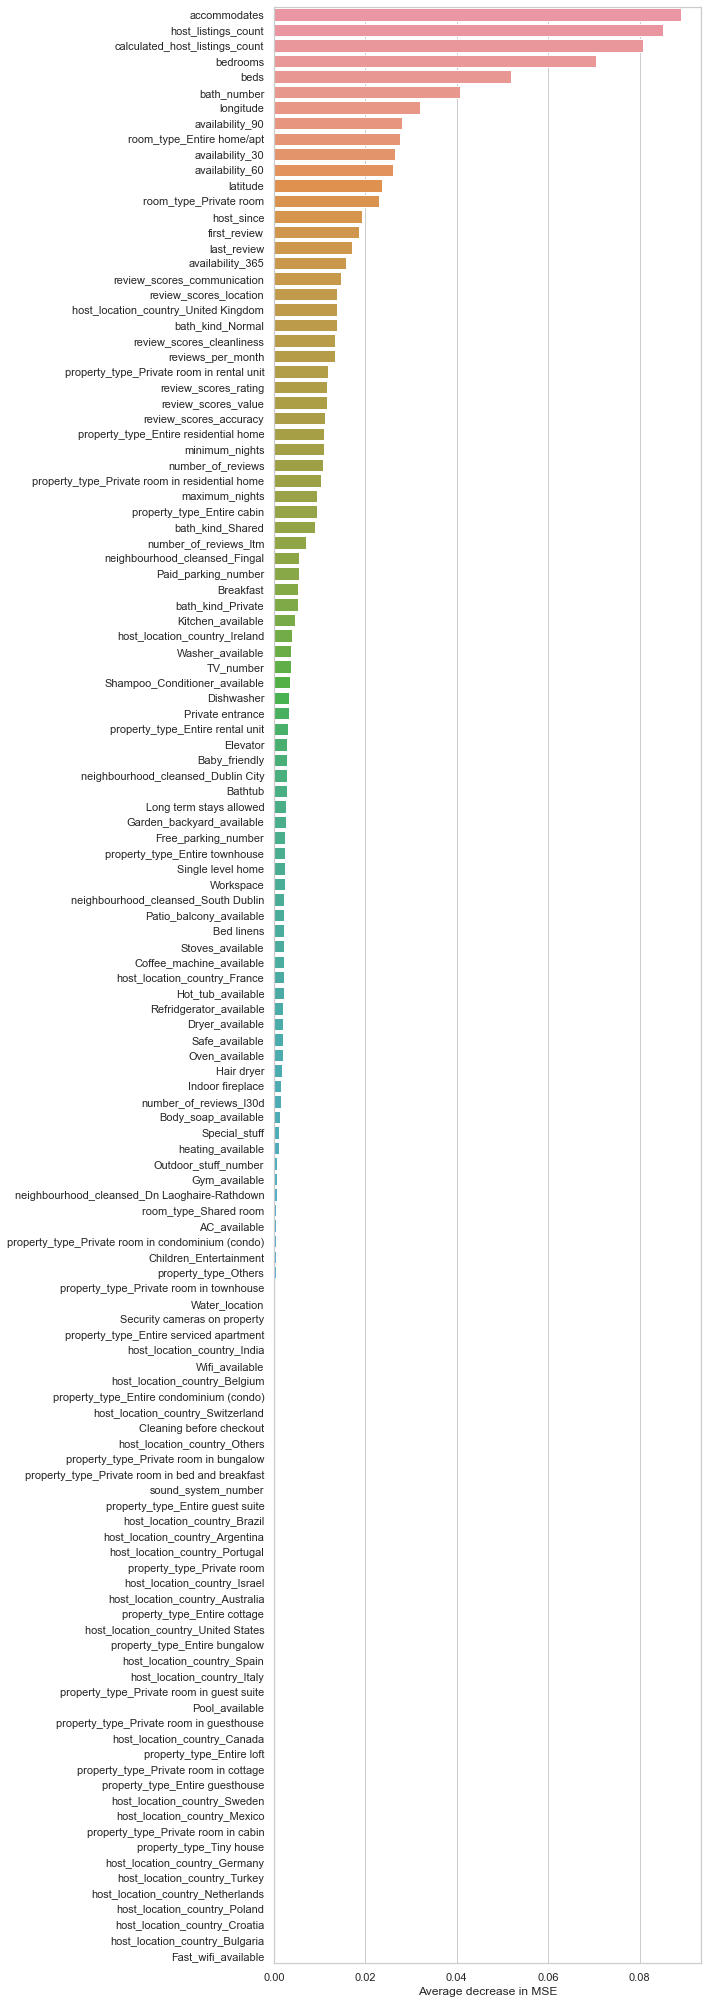

In [27]:
# sort the features by their importance
plot_data = forest_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Average decrease in MSE")
fig.tight_layout()
fig.show()

The blue bars of the diagram indicate by how much the impurity was decreased on average when using the feature in a tree. The black lines give the standard deviation
Problem of the importance measure: We only consider the training data and how important each feature is on average for the training model. 

Therefore we also use another approach. We take the test data and shuffle a feature randomly and evaluate the mode score. Thereby we cut the connection between target and feature. If the model accuracy/MSE decreases significantly the feature might be important for the prediction.

### Permutation approach

In [28]:
result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42)
forest_importances = pd.Series(result.importances_mean, index=listings.columns)
# sort the features by their importance
plot_data = forest_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

KeyboardInterrupt: 

## Ridge with Kernel model
Let's repeat the permutation approach for several other algorithms

### rbf kernel

In [29]:
# train Ridge Kernel model
rbf_ridge = KernelRidge(kernel = "rbf", alpha = 0)
rbf_ridge.fit(X_train, y_train)
rbf_ridge.score(X_test, y_test)

-0.18716728127914783

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_3738/1598192241.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


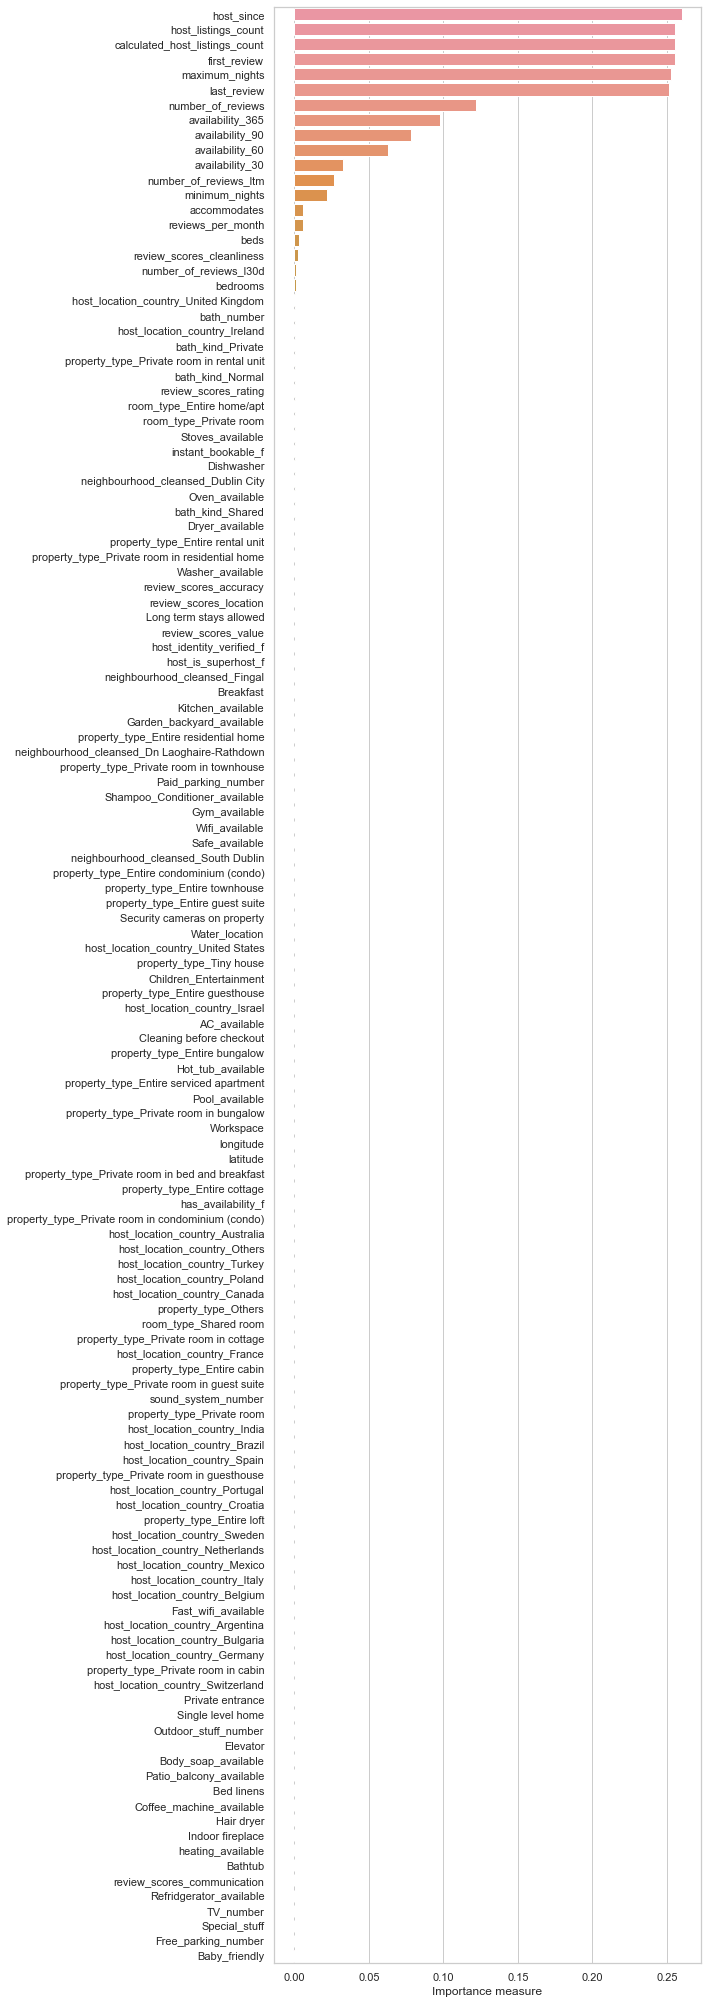

In [27]:
result = permutation_importance(rbf_ridge, X_test, y_test, n_repeats=10, random_state=42)
rbf_ridge_importances = pd.Series(result.importances_mean, index=listings.columns)
# sort the features by their importance
plot_data = rbf_ridge_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

### linear kernel

In [30]:
# train Ridge Kernel model
linear_ridge = KernelRidge(kernel = "linear")
linear_ridge.fit(X_train, y_train)
linear_ridge.score(X_test, y_test)

0.2768762920680351

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_3738/3969062155.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


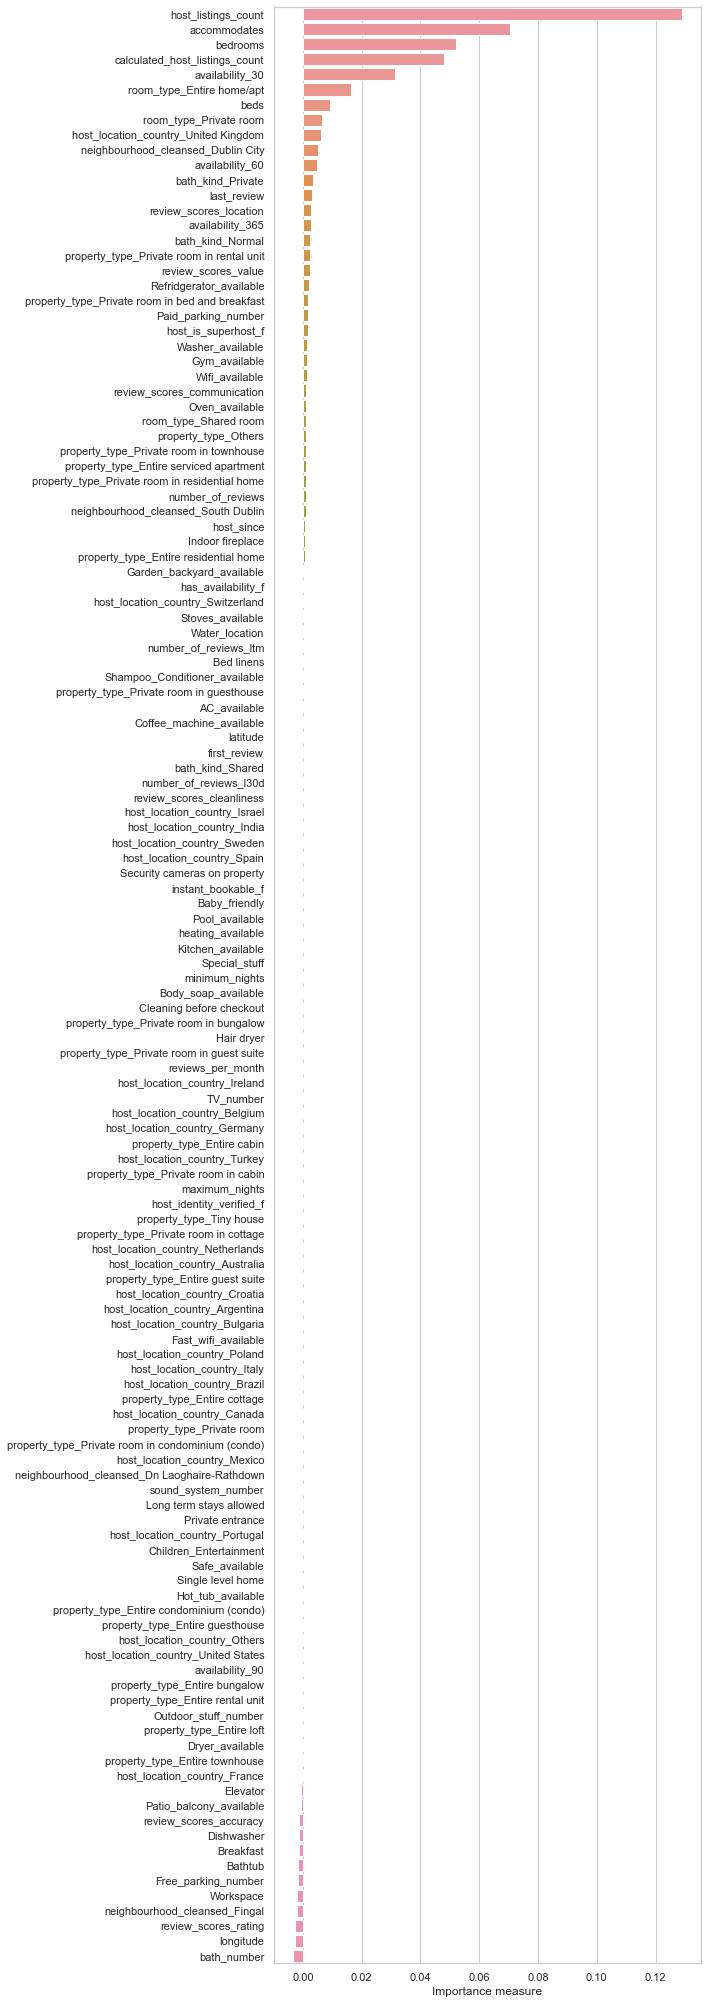

In [29]:
result = permutation_importance(linear_ridge, X_test, y_test, n_repeats=10, random_state=42)
linear_ridge_importances = pd.Series(result.importances_mean, index=listings.columns)
# sort the features by their importance
plot_data = linear_ridge_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

## SVR
### rbf kernel

In [31]:
# train Ridge Kernel model
rbf_svr= SVR(kernel = "rbf")
rbf_svr.fit(X_train, y_train)
rbf_svr.score(X_test, y_test)

-0.041718898912411095

In [31]:
#result = permutation_importance(rbf_svr, X_test, y_test, n_repeats=10, random_state=42, scoring = "r2")
#rbf_svr_importances = pd.Series(result.importances_mean, index=listings.columns)
# sort the features by their importance
#plot_data = rbf_svr_importances.sort_values(ascending=False)

# plotting
#sn.set_theme(style = "whitegrid")
#fig, ax = plt.subplots(figsize = (10,28))
#sn.barplot(x=plot_data.values, y=plot_data.index)
#ax.set_xlabel("Importance measure")
#fig.tight_layout()
#fig.show()

In [32]:
# train Ridge Kernel model
linear_svr= LinearSVR(max_iter = 100000)
linear_svr.fit(X_train, y_train)
linear_svr.score(X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.35889381510109053

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_3738/827178593.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


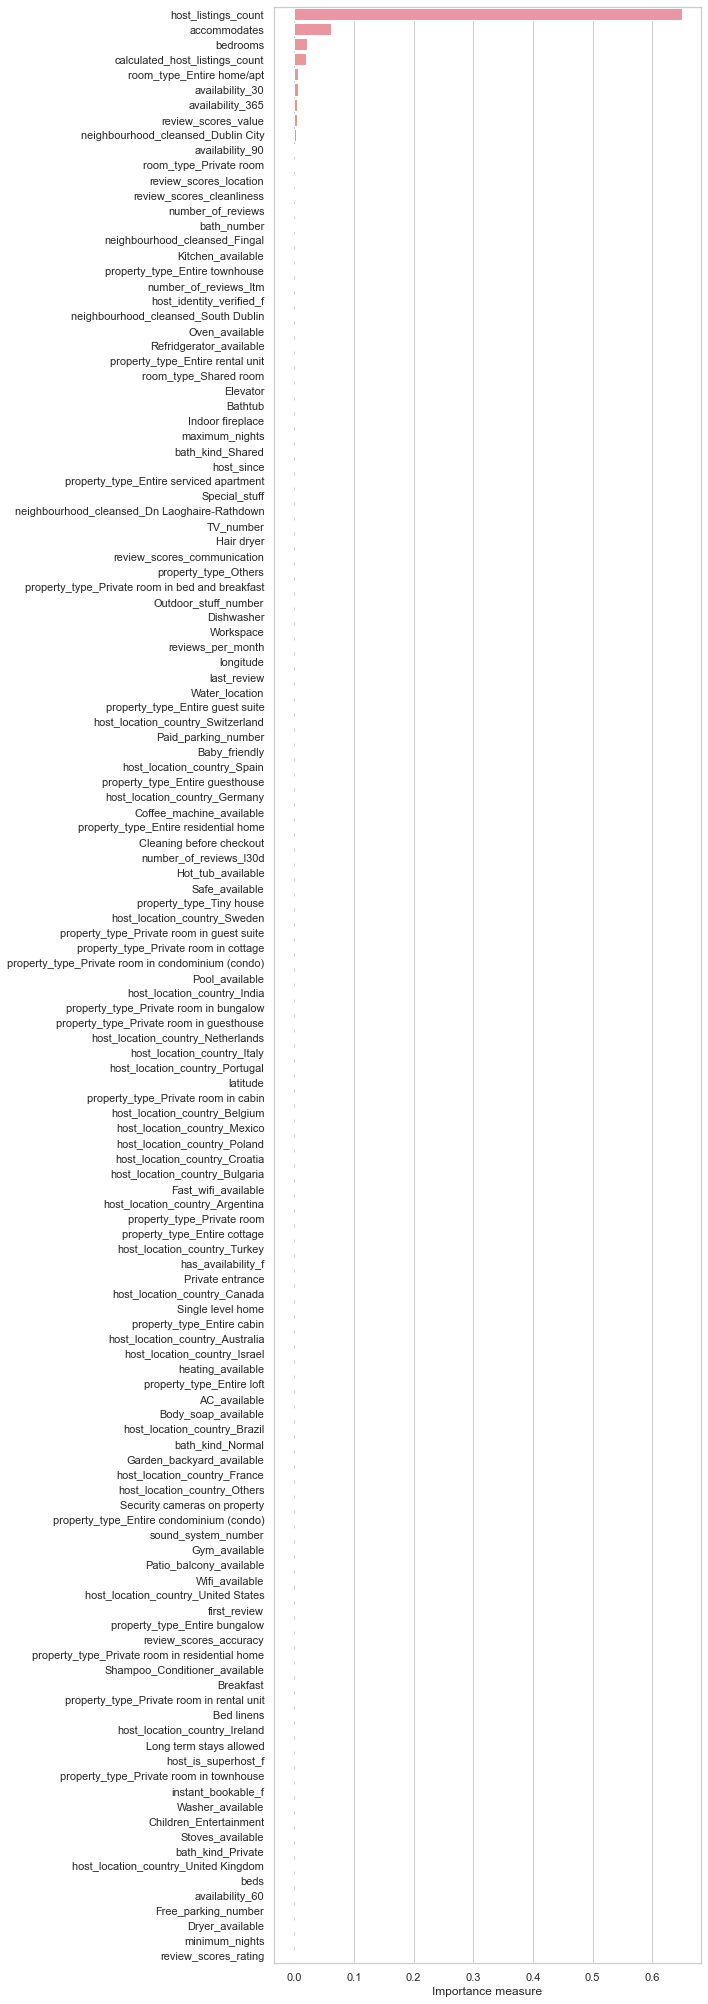

In [33]:
result = permutation_importance(linear_svr, X_test, y_test, n_repeats=10, random_state=42, scoring = "r2")
linear_svr_importances = pd.Series(result.importances_mean, index=listings.columns)
# sort the features by their importance
plot_data = linear_svr_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

## Boosting

In [35]:
params = {
    "n_estimators": 200,
    "max_depth": 2,
    "min_samples_split": 10,
    "learning_rate": 0.1,
    "loss": "squared_error",
}

In [36]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.35526984734021805

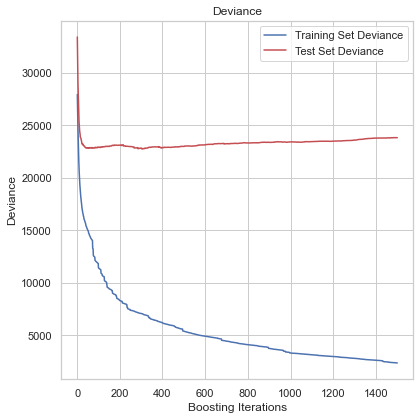

In [36]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

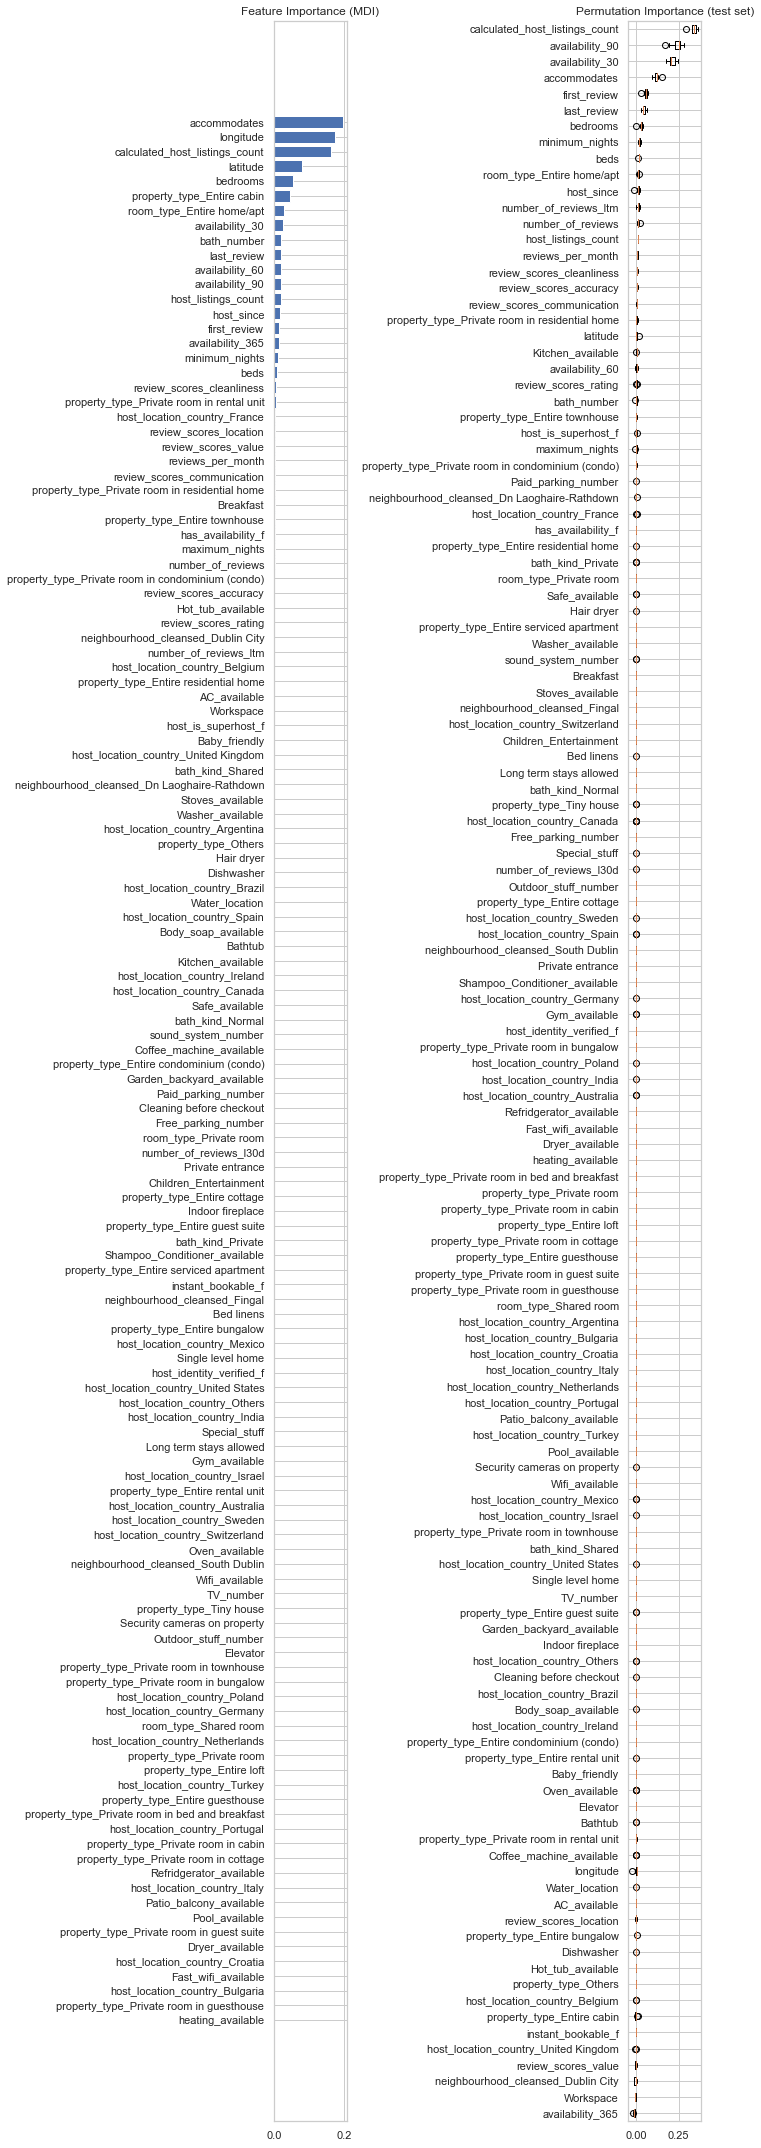

In [37]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(10, 30))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(listings.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(listings.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

The problem of this method is that the importance of highly correlated amenities disappears as shuffling the first feature the model could still get the information by the second correlated feature. 
This can be the case for our data. For instance the possibility to stay for a longer time might be highly correlated with the availability of a washing machine or having a kitchen and an oven.

# Correlation approach
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

We should take the correlation of the variables into account. Therefore we need different approaches dependent on the scale of variables
- pearson: numeric and numeric 
- jaccard: binary and binary
- point-biserial: binary and numeric

In [37]:
listings.columns.values

array(['host_since', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'bath_number', 'Bathtub', 'Bed linens', 'Breakfast',
       'Cleaning before checkout', 'Dishwasher', 'Elevator', 'Hair dryer',
       'Indoor fireplace', 'Long term stays allowed', 'Private entrance',
       'Security cameras on property', 'Single level home',
       'Special_stuff', 'TV_number', 'Outdoor_stuff_number',
       'Baby_friendly', 'sound_system_number', 'Oven_available',
       'Stoves

In [109]:
num_col = ['host_since', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'bath_number', 'Special_stuff', 'TV_number', 'Outdoor_stuff_number',
       'Baby_friendly', 'sound_system_number', 'Free_parking_number', 'Paid_parking_number']


binary_col = ['Bathtub', 'Bed linens', 'Breakfast',
       'Cleaning before checkout', 'Dishwasher', 'Elevator', 'Hair dryer',
       'Indoor fireplace', 'Long term stays allowed', 'Private entrance',
       'Security cameras on property', 'Single level home', 'Oven_available',
       'Stoves_available', 'Refridgerator_available',
       'Body_soap_available', 'Garden_backyard_available',  'Children_Entertainment', 'Workspace',
       'Shampoo_Conditioner_available', 'Fast_wifi_available',
       'Gym_available', 'Coffee_machine_available', 'Dryer_available',
       'Washer_available', 'Hot_tub_available', 'Pool_available',
       'Patio_balcony_available', 'Wifi_available', 'AC_available',
       'heating_available', 'Kitchen_available', 'Safe_available',
       'Water_location','neighbourhood_cleansed_Dn Laoghaire-Rathdown',
       'neighbourhood_cleansed_Dublin City',
       'neighbourhood_cleansed_Fingal',
       'neighbourhood_cleansed_South Dublin',
       'property_type_Entire bungalow', 'property_type_Entire cabin',
       'property_type_Entire condominium (condo)',
       'property_type_Entire cottage', 'property_type_Entire guest suite',
       'property_type_Entire guesthouse', 'property_type_Entire loft',
       'property_type_Entire rental unit',
       'property_type_Entire residential home',
       'property_type_Entire serviced apartment',
       'property_type_Entire townhouse', 'property_type_Others',
       'property_type_Private room',
       'property_type_Private room in bed and breakfast',
       'property_type_Private room in bungalow',
       'property_type_Private room in cabin',
       'property_type_Private room in condominium (condo)',
       'property_type_Private room in cottage',
       'property_type_Private room in guest suite',
       'property_type_Private room in guesthouse',
       'property_type_Private room in rental unit',
       'property_type_Private room in residential home',
       'property_type_Private room in townhouse',
       'property_type_Tiny house', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'host_location_country_Argentina',
       'host_location_country_Australia', 'host_location_country_Belgium',
       'host_location_country_Brazil', 'host_location_country_Bulgaria',
       'host_location_country_Canada', 'host_location_country_Croatia',
       'host_location_country_France', 'host_location_country_Germany',
       'host_location_country_India', 'host_location_country_Ireland',
       'host_location_country_Israel', 'host_location_country_Italy',
       'host_location_country_Mexico',
       'host_location_country_Netherlands',
       'host_location_country_Others', 'host_location_country_Poland',
       'host_location_country_Portugal', 'host_location_country_Spain',
       'host_location_country_Sweden',
       'host_location_country_Switzerland',
       'host_location_country_Turkey',
       'host_location_country_United Kingdom',
       'host_location_country_United States', 'bath_kind_Normal',
       'bath_kind_Private', 'bath_kind_Shared']


In [110]:
# sanity check
len(num_col + binary_col) == len(listings.columns)

True

## Pearson Correlation

In [111]:
numerical_df = listings.filter(num_col)

sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.feature_names_in_ = numerical_df.columns

sel.fit_transform(numerical_df)
num_col = sel.get_feature_names_out()
print(str(len(numerical_df.columns) - len(num_col)) + " variables have been removed")
numerical_df = numerical_df.filter(num_col)

4 variables have been removed


In [112]:
print(num_df.shape)
numerical_df.shape

(4913, 30)


(4913, 30)

In [113]:
PEARSON = np.abs(numerical_df.corr())

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/605140178.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(im)


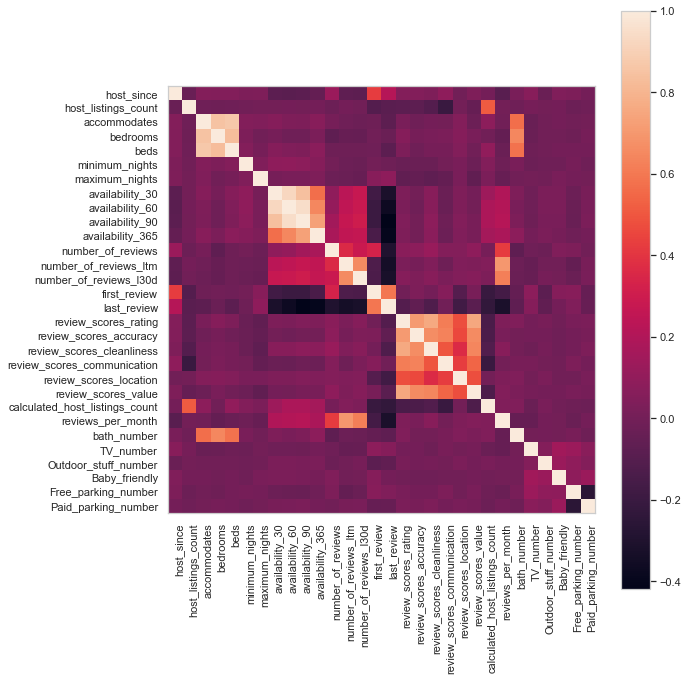

In [114]:
fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(listings.filter(num_col).corr())
ax.figure.colorbar(im)
ax.grid(None)
ax.set_xticks(np.arange(len(num_col)), labels=num_col)
ax.set_yticks(np.arange(len(num_col)), labels=num_col)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
fig.tight_layout()
plt.show()

## Binary Features

Let's remove features which don't have enough variance or in other words which are either 0 or 1 in most of the cases 
- https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
- https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f







In [115]:
from sklearn.feature_selection import VarianceThreshold


In [116]:
binary_df = listings.filter(binary_col)

sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.feature_names_in_ = binary_df.columns

sel.fit_transform(binary_df)
binary_col = sel.get_feature_names_out()
print(str(len(binary_df.columns) - len(binary_col)) + " variables have been removed")
binary_df = binary_df.filter(binary_col)

59 variables have been removed


### Jaccard Correlation

At first lets define a function that calculates the Jaccard Correlation coefficient

In [117]:
def jac(x,y):
    a = ((x == 1) == (y == 1)).sum()
    b = ((x == 1) == (y == 0)).sum()
    c = ((x == 0) == (y == 1)).sum()
    #d = ((x == 0) == (y == 0)).sum()

    j = a/(a+b+c)

    return j

Now calculate the coefficient for each combination of binary covariables

In [118]:
# init matrix
A = np.zeros((len(binary_col), len(binary_col)))

for i, a in enumerate(binary_col):
    for j, b in enumerate(binary_col):
        A[i,j] = jac(binary_df[a], binary_df[b])


/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/2473703125.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(im)


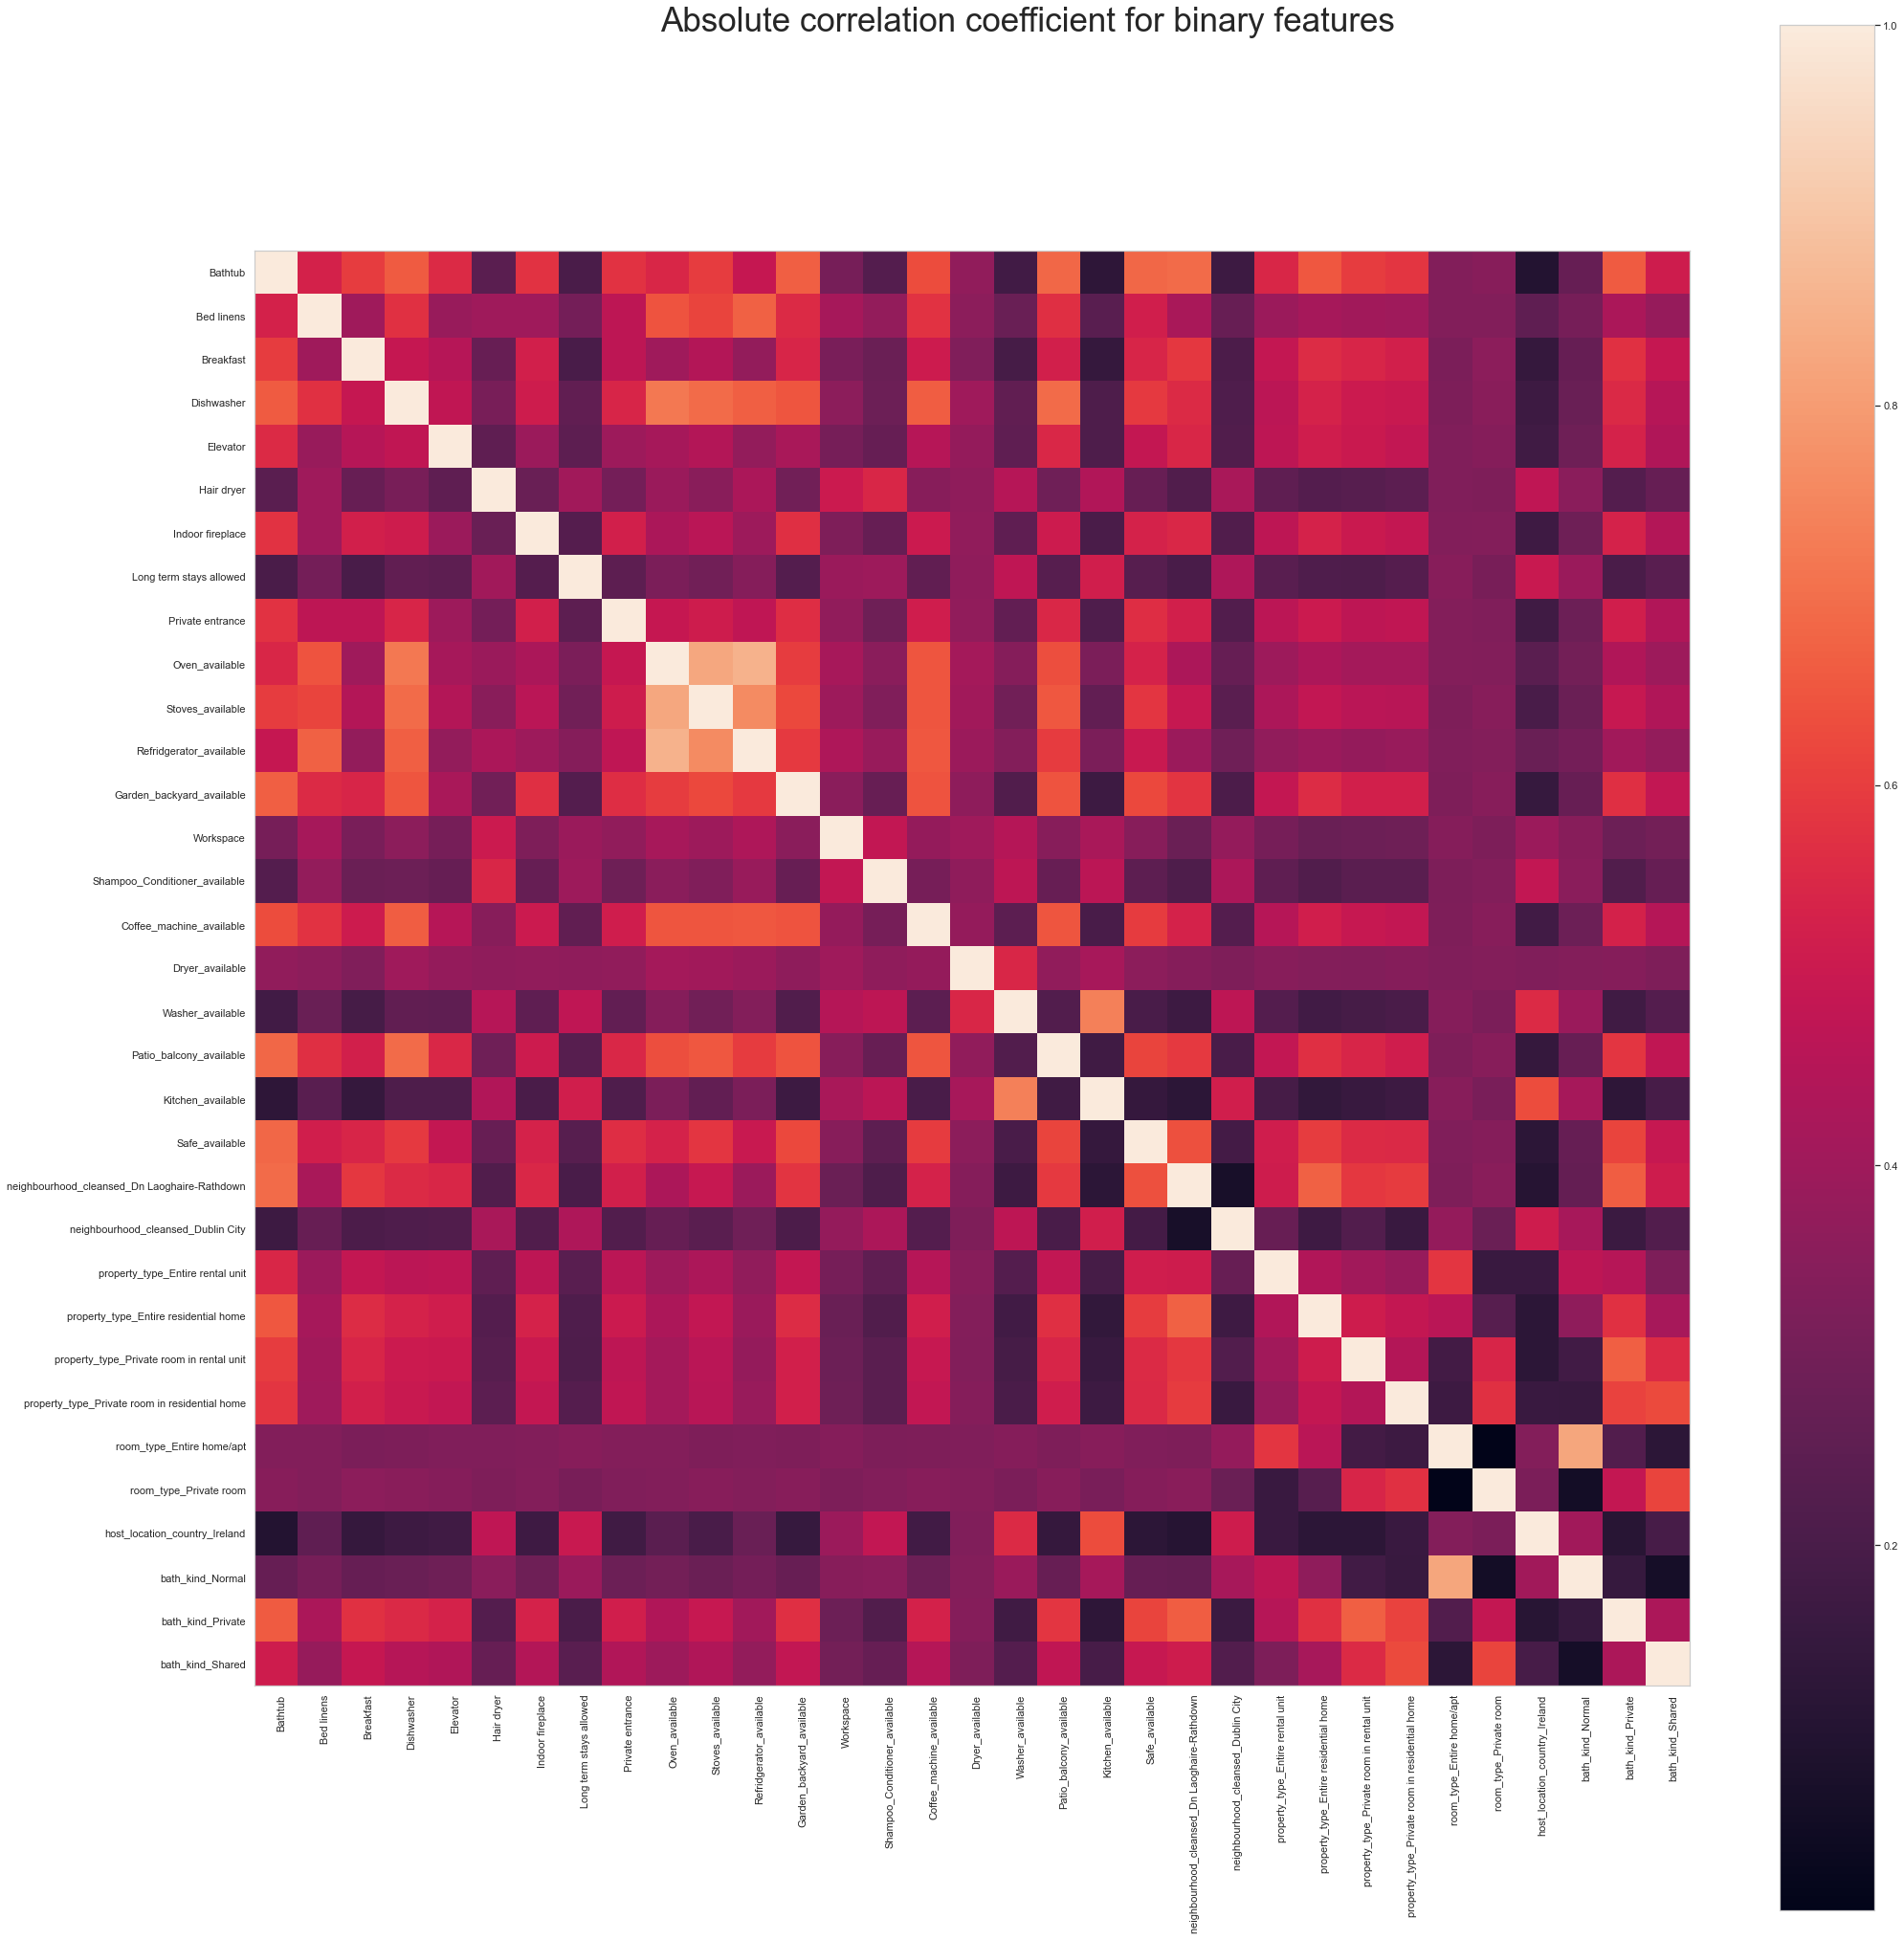

In [119]:
JACCARD = pd.DataFrame(np.abs(A))
jac_df = pd.DataFrame(np.abs(A))

fig, ax = plt.subplots(figsize = (30,30))
im = ax.imshow(jac_df)
ax.figure.colorbar(im)
ax.grid(None)
ax.set_xticks(np.arange(len(binary_col)), labels=binary_col)
ax.set_yticks(np.arange(len(binary_col)), labels=binary_col)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
fig.suptitle("Absolute correlation coefficient for binary features", fontsize = 35)
fig.tight_layout()
plt.show()

## Point-Biserial

- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html

In [120]:
from scipy import stats
binaries = binary_df
numericals = numerical_df

# init matrix
A = np.zeros((len(binaries.columns), len(numericals.columns)))
P = np.zeros((len(binaries.columns), len(numericals.columns)))

for i, a in enumerate(binaries.columns):
    for j, b in enumerate(numericals.columns):
        A[i,j], P[i,j] = stats.pointbiserialr(binaries[a], numericals[b])

    


/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/357590416.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(im)


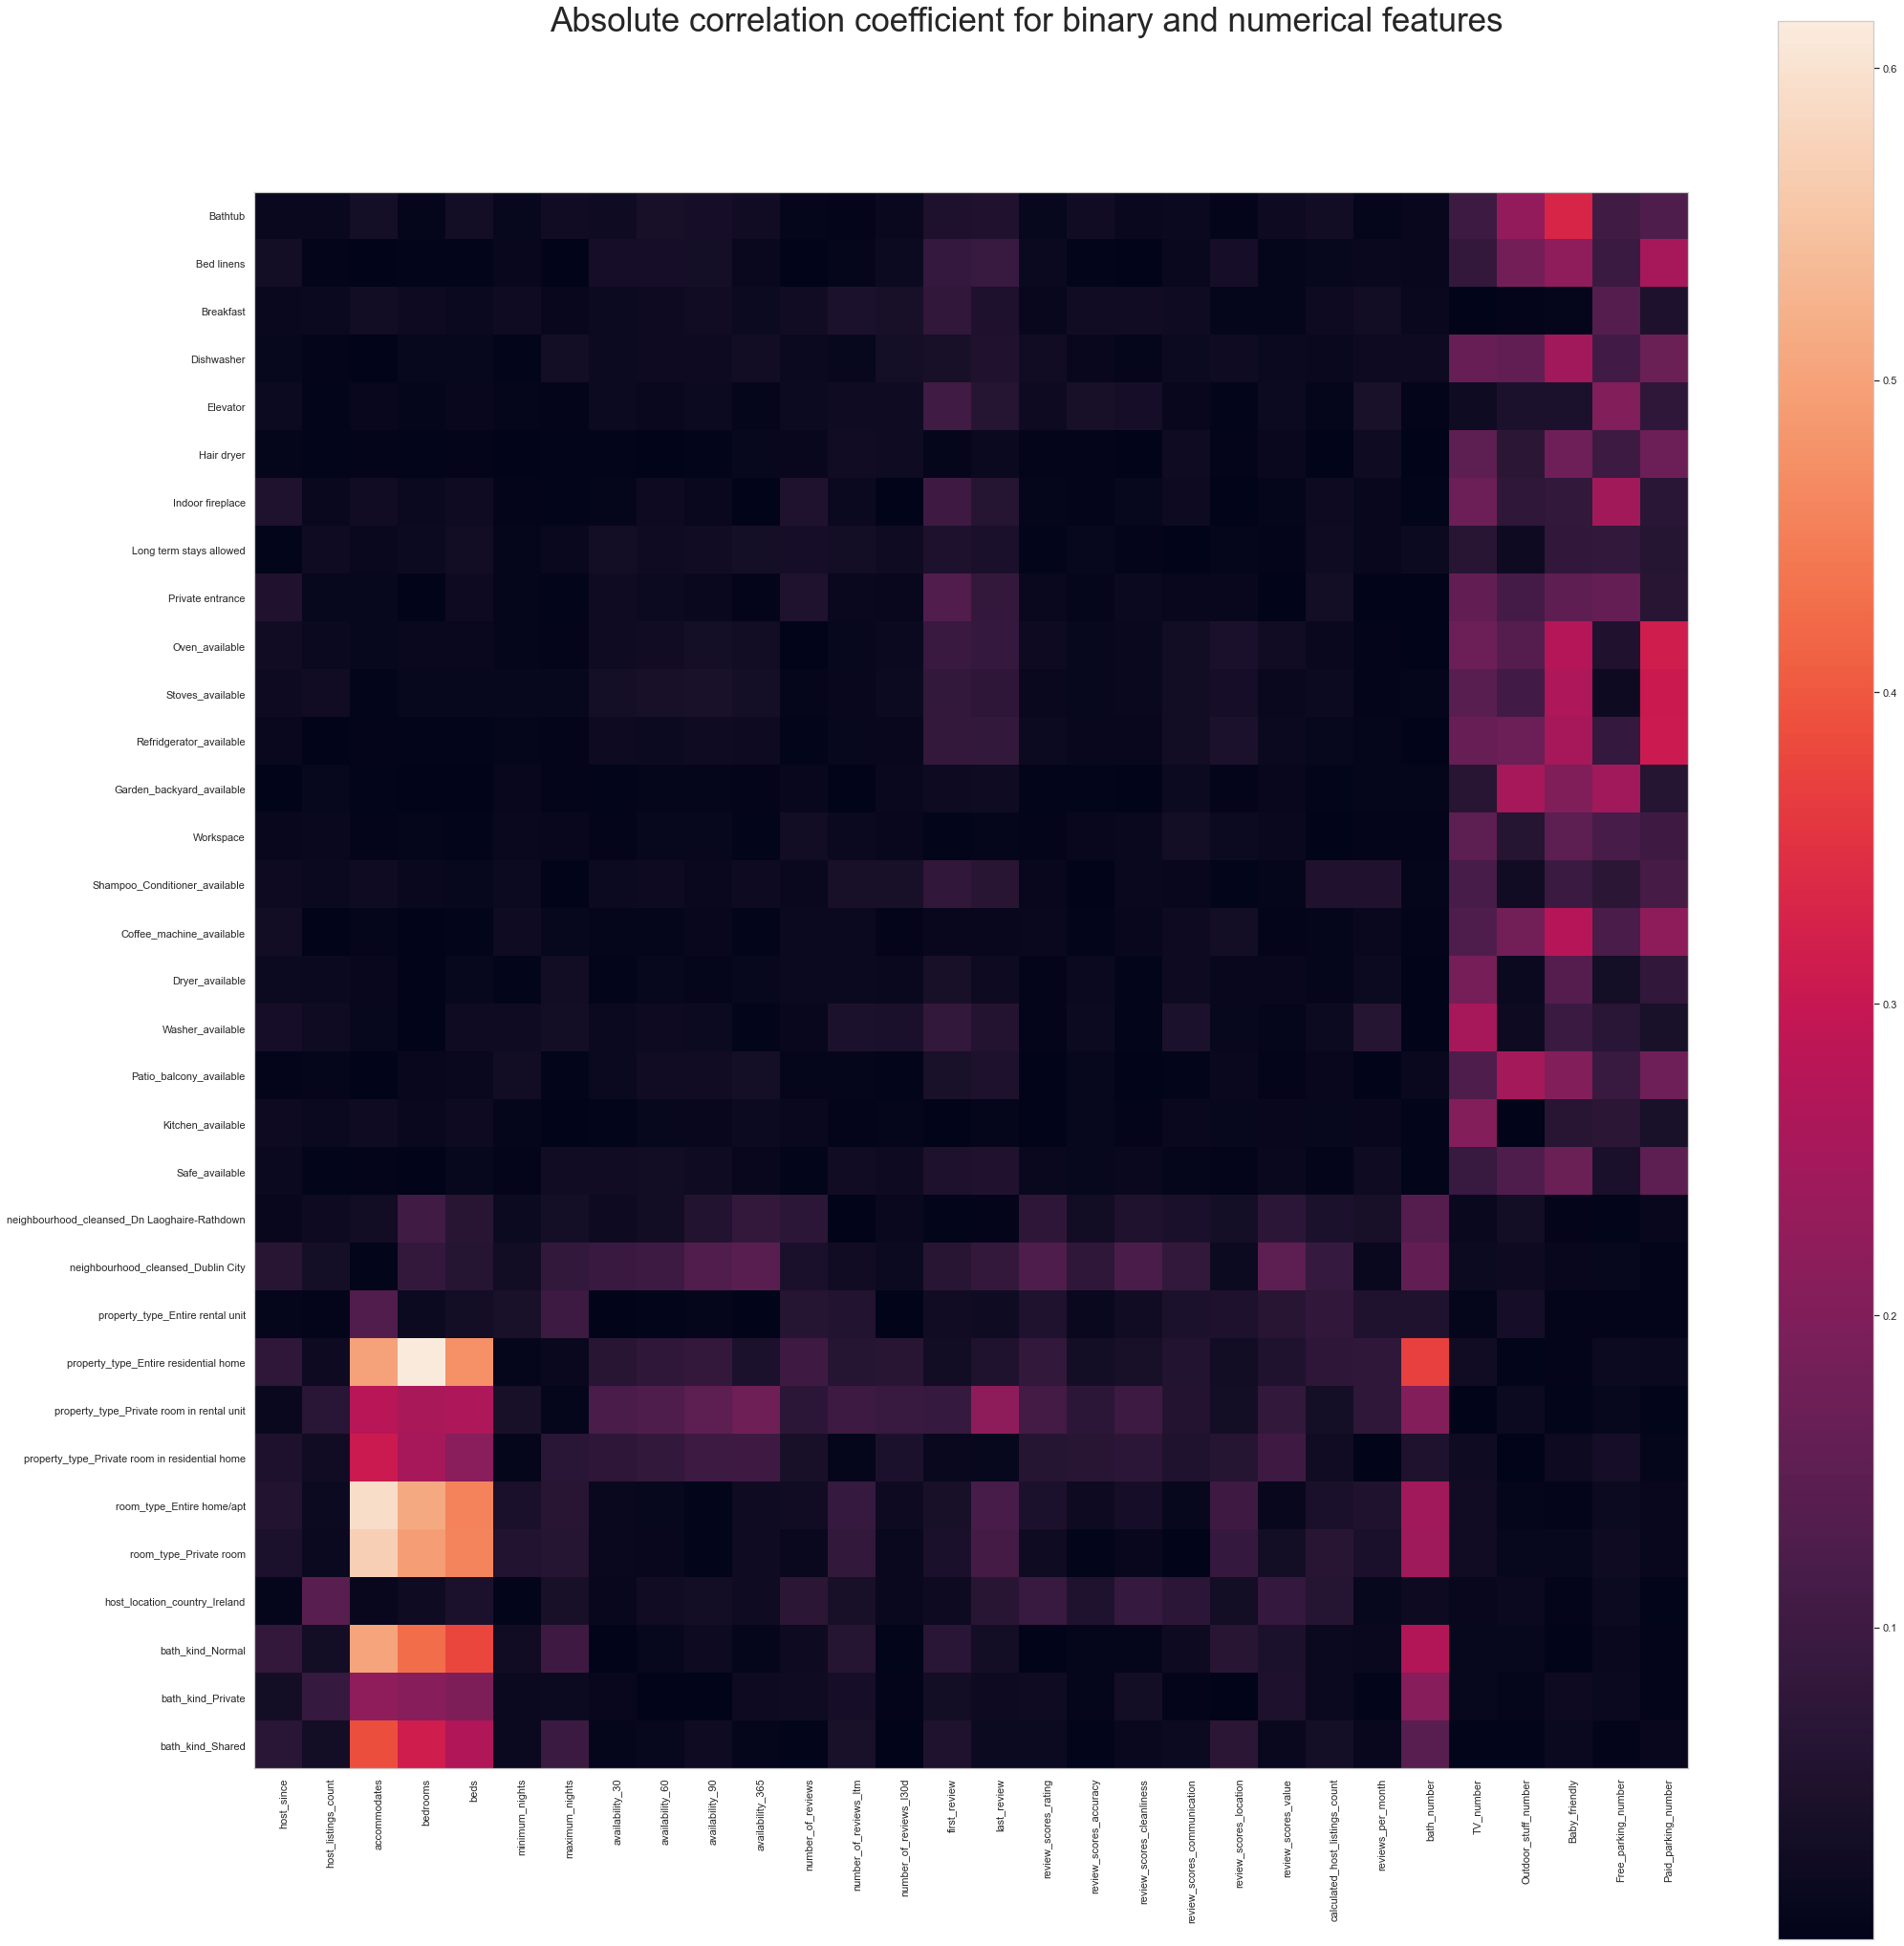

In [121]:
BISERIAL = pd.DataFrame(np.abs(A))
bis_df = pd.DataFrame(np.abs(A))

fig, ax = plt.subplots(figsize = (30,30))
im = ax.imshow(bis_df)
ax.figure.colorbar(im)
ax.grid(None)
ax.set_xticks(np.arange(len(numericals.columns)), labels=numericals)
ax.set_yticks(np.arange(len(binaries.columns)), labels=binaries)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
fig.suptitle("Absolute correlation coefficient for binary and numerical features", fontsize = 35)
fig.tight_layout()
plt.show()

## Combine all correlation coefficients in a single matrix

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/2021638428.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(im)


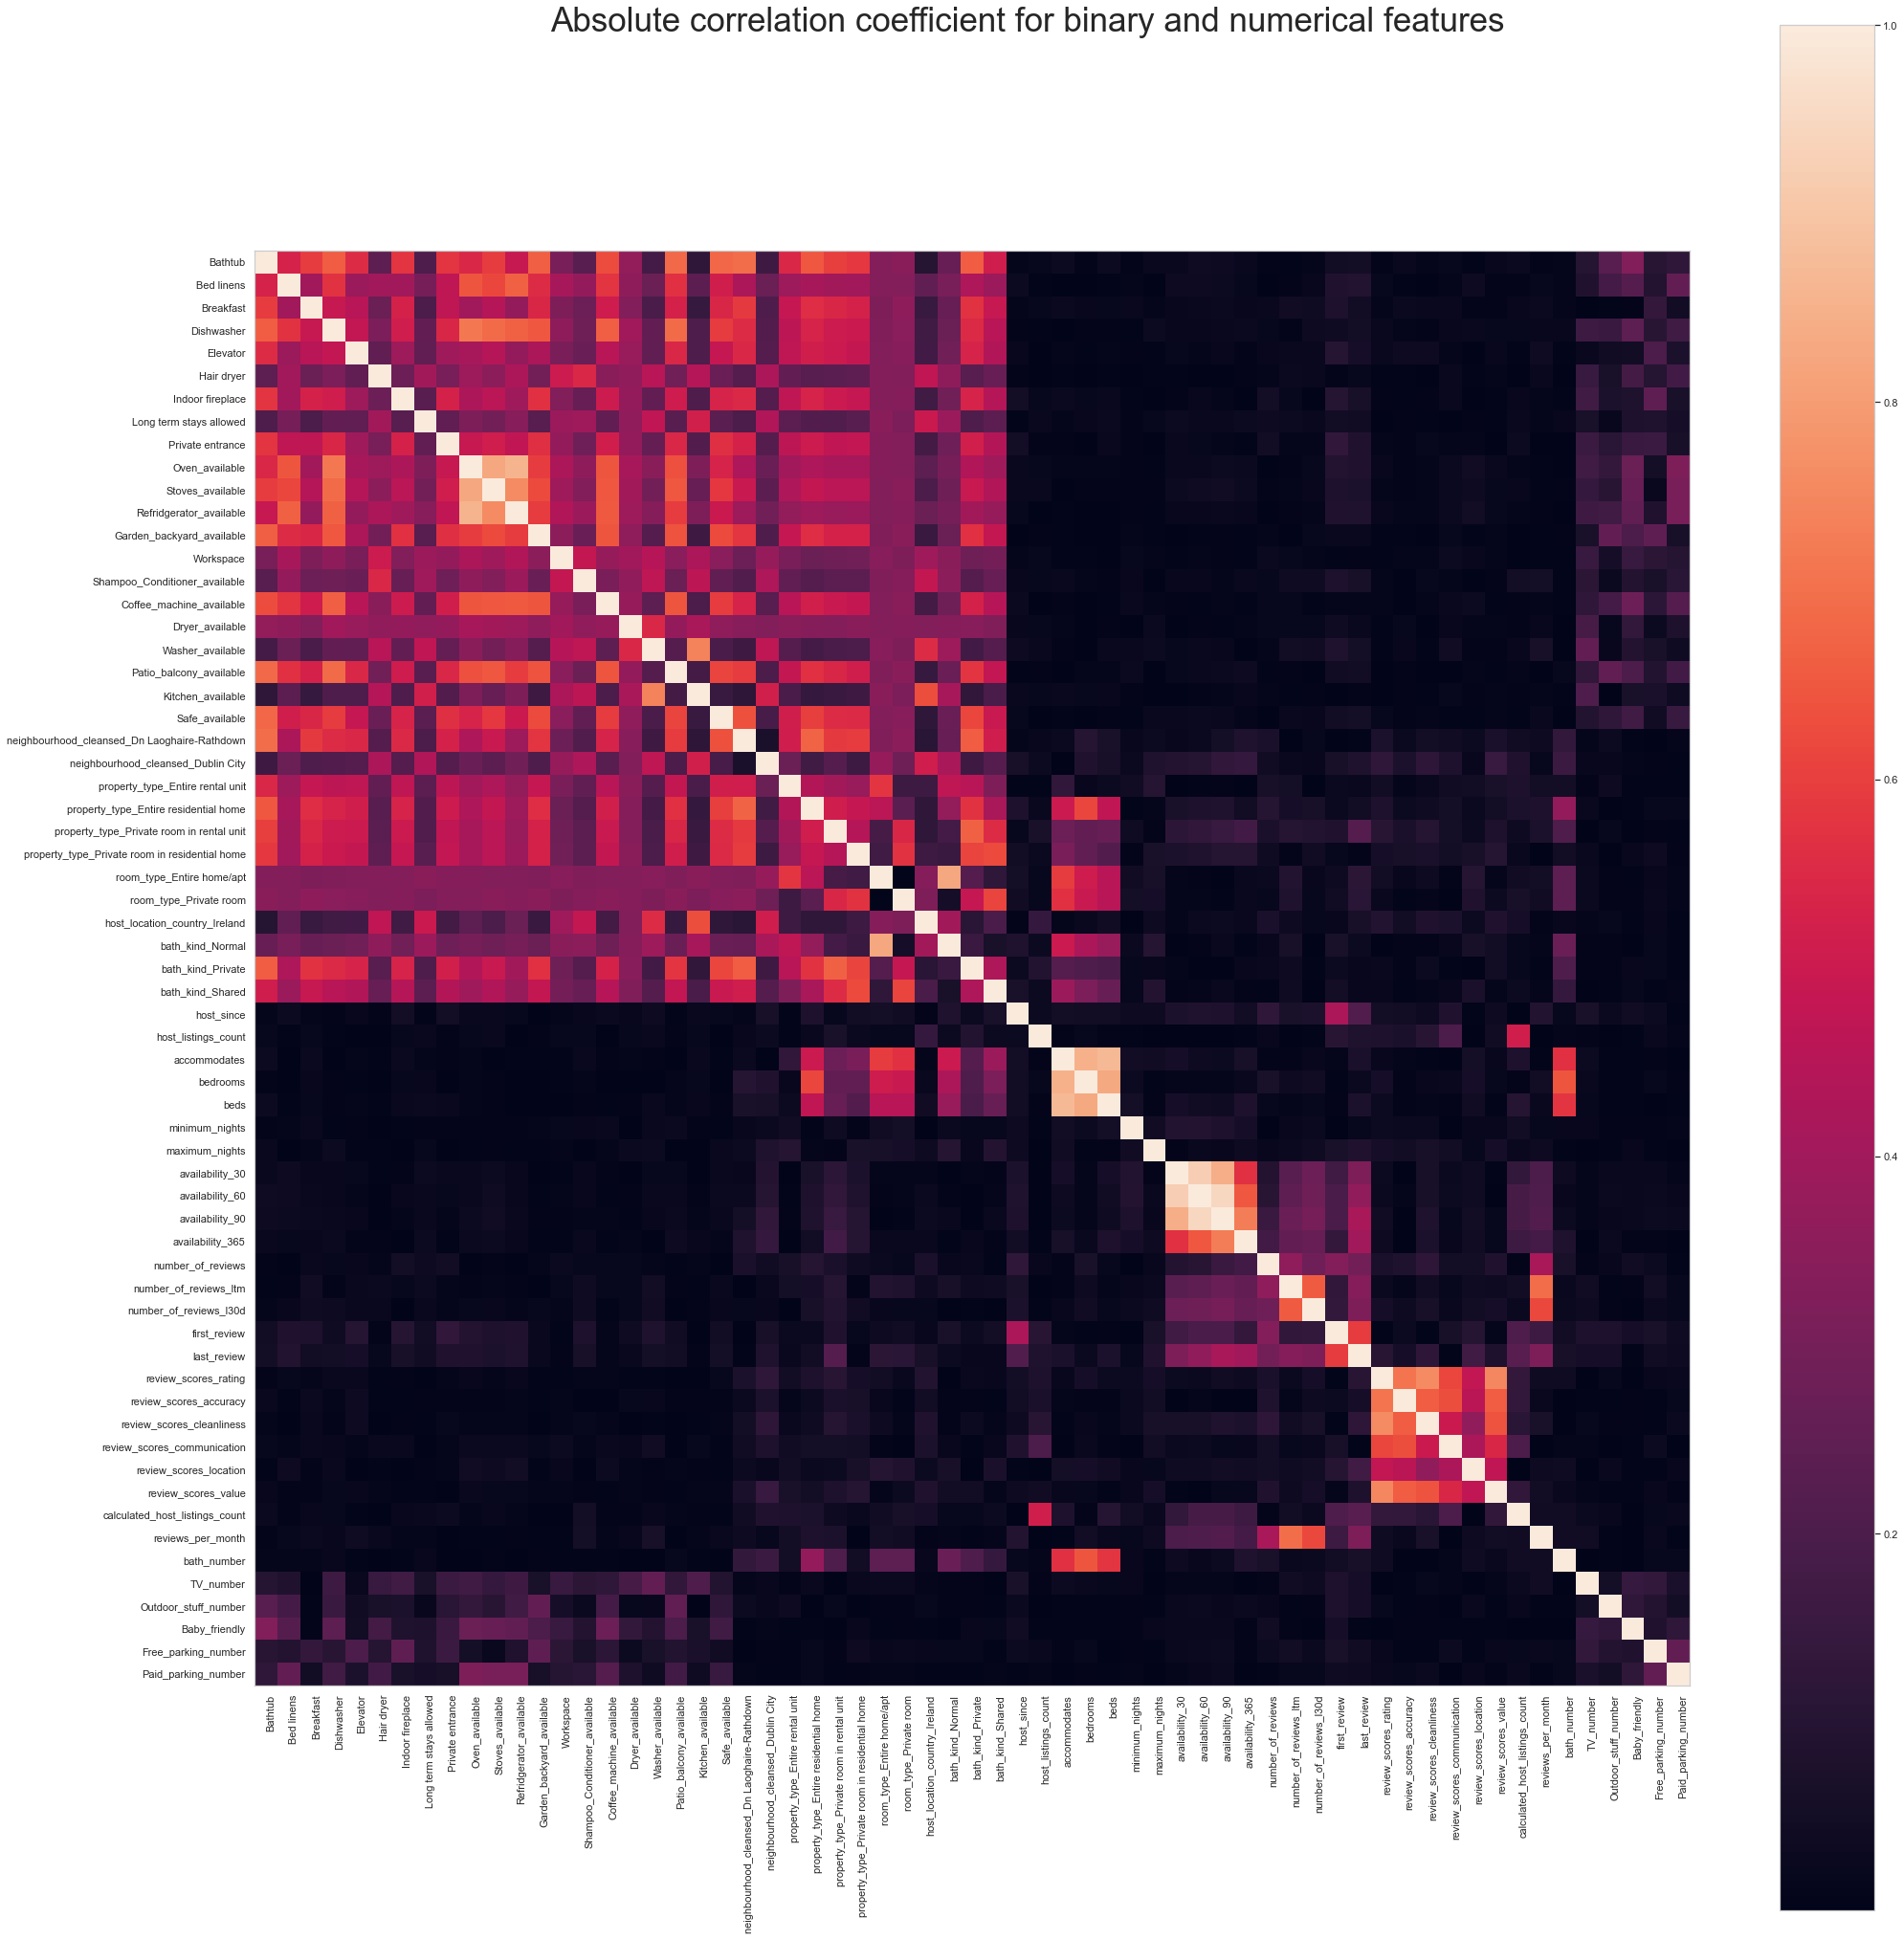

In [134]:
all_col = list(binary_col) + list(num_col)
listings_compl = listings.filter(all_col)
C = np.zeros((len(all_col), len(all_col)))

C[:len(binary_col),:len(binary_col)] = JACCARD
C[len(binary_col):,len(binary_col):] = PEARSON
C[len(binary_col):,:len(binary_col)] = BISERIAL.T
C[:len(binary_col),len(binary_col):] = BISERIAL

C_df = pd.DataFrame(np.abs(C))

fig, ax = plt.subplots(figsize = (30,30))
im = ax.imshow(C_df)
ax.figure.colorbar(im)
ax.grid(None)
ax.set_xticks(np.arange(len(C_df.columns)), labels=all_col)
ax.set_yticks(np.arange(len(C_df.columns)), labels=all_col)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
fig.suptitle("Absolute correlation coefficient for binary and numerical features", fontsize = 35)
fig.tight_layout()
plt.show()

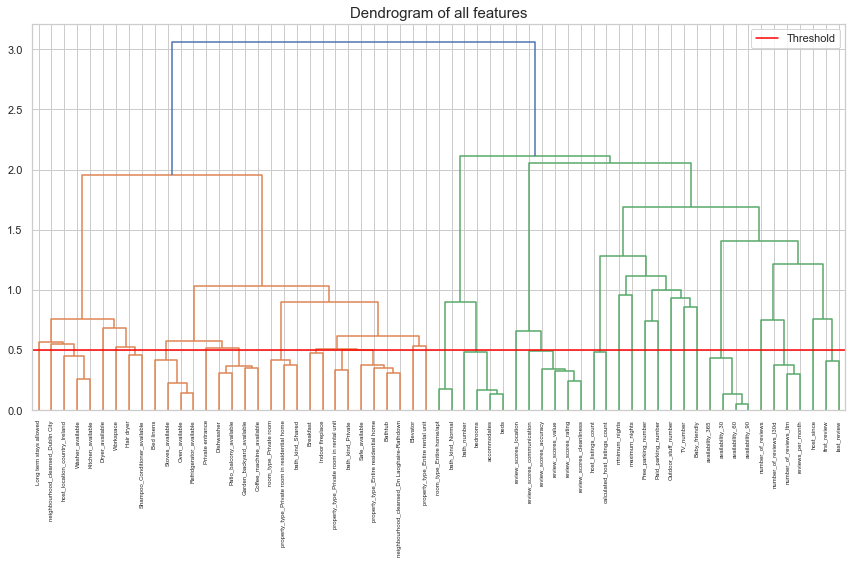

In [135]:

import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
corr = C
# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=all_col, ax=ax, leaf_rotation=90,
)
dendro_idx = np.arange(0, len(dendro["ivl"]))
ax.set_title("Dendrogram of all features", fontsize = 15)
ax.axhline(0.5, color = "red", label = "Threshold")
ax.legend()
fig.tight_layout()
plt.show()

The dendrogram shows which features are so similar that it might be reasonable to keep only one of those variables. We can set our threshold around 0.5 and explore the clusters we find below:

### For threshold = 0.5
1. keep room type Entire home/apt
3. keep kitchen available
4. combine to bathroom essentials 
5. combine stove, oven and refridgerator to large kitchen appliances
6. combine patio balcony and garden to outside areas
7. keep room type private room 
8. keep breakfast 
9. keep property type private room in rental unit
10. keep property type entire residential home


In [136]:
listings_compl = drop_col(listings_compl, ["host_location_country_Ireland", "Washer_available", "Bed linens", "Dishwasher", "Coffee_machine_available", 
    "property_type_Private room in residential home", "bath_kind_Shared", "Indoor fireplace", "bath_kind_Private", "Safe_available", 
    "Bathtub", "neighbourhood_cleansed_Dn Laoghaire-Rathdown", "bath_kind_Normal", "bedrooms", "beds","review_scores_accuracy", "review_scores_value", "review_scores_cleanliness",
    "host_listings_count", "availability_30", "availability_60", "availability_90", "number_of_reviews_l30d", "number_of_reviews_ltm", "first_review"], regex = False)
listings_compl = in_one(listings_compl, "(Shampoo_Conditioner)|(Hair dryer)", "bathroom_essentials", regex = True, sum = True, drop = True)
listings_compl = in_one(listings_compl, "(stoves_)|(oven_)|(refridgerator)", "large_kitchen_appliances", regex = True, sum = True, drop = True)
listings_compl = in_one(listings_compl, "(patio_balcony)|(garden_)", "outside_area_available", regex = True, sum = True, drop = True)

/Users/dmnk/OneDrive - stud.uni-goettingen.de/Dokumente/3. Semester/SeminarDL/DubAir/helpers.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  col_filter = df.columns.str.contains(in_cat, case = False, regex = True)


# Final Selection

## Random Forest Model

In [241]:
# train full random forest
forest = RandomForestRegressor(1000, random_state = 123, max_features = "sqrt", max_depth = 7)
X_train, X_test, y_train, y_test = train_test_split(listings_compl, price, random_state = 123, test_size = 0.2)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.34813865842560654

## Naive approach with training data

Compute the importance of each feature which is basically the average contribution to the decrease in impurity/MSE. Let's also consider the standard deviation of this contribution.

In [242]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=listings_compl.columns)

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/1908474449.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


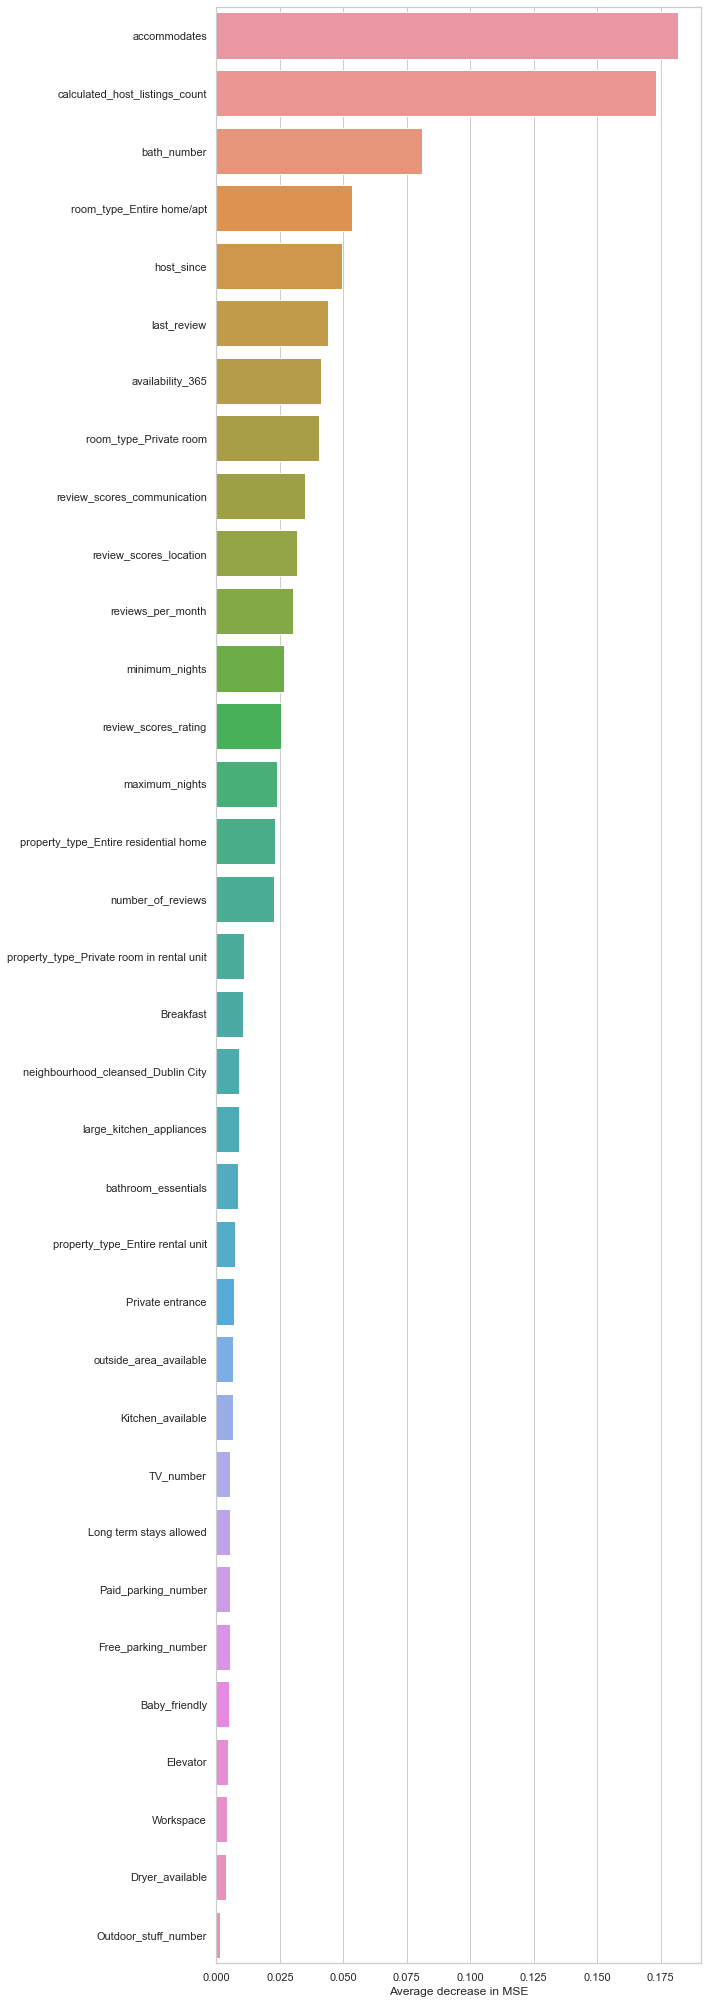

In [243]:
# sort the features by their importance
plot_data = forest_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Average decrease in MSE")
fig.tight_layout()
fig.show()

The blue bars of the diagram indicate by how much the impurity was decreased on average when using the feature in a tree. The black lines give the standard deviation
Problem of the importance measure: We only consider the training data and how important each feature is on average for the training model. 

Therefore we also use another approach. We take the test data and shuffle a feature randomly and evaluate the mode score. Thereby we cut the connection between target and feature. If the model accuracy/MSE decreases significantly the feature might be important for the prediction.

### Permutation approach

In [246]:
n_repeats = 10

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/2623107921.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


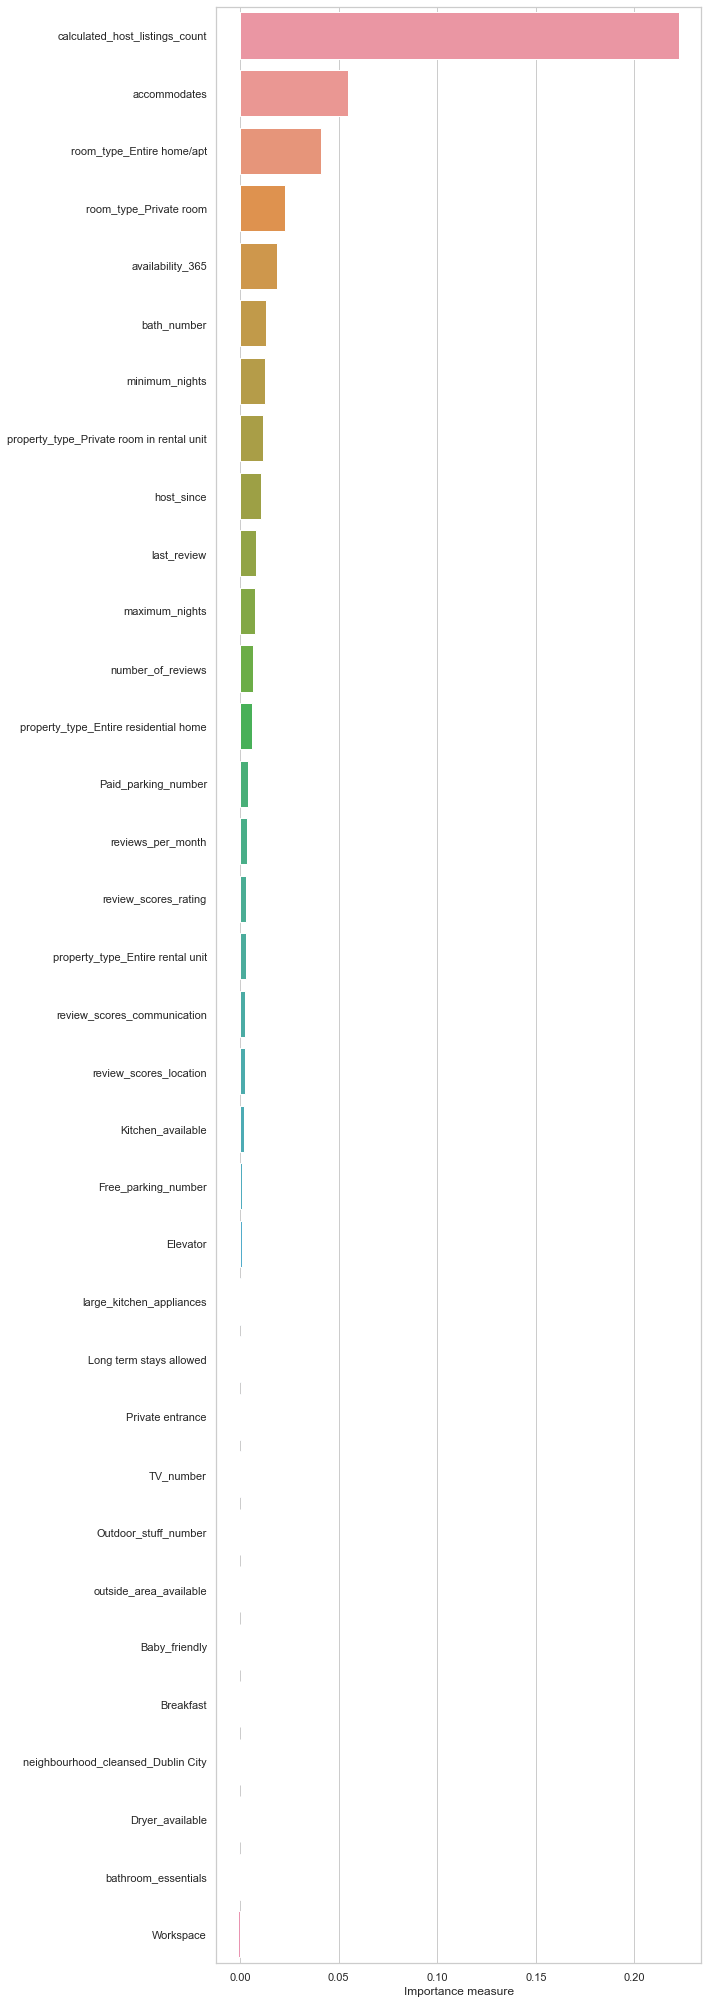

In [247]:
result = permutation_importance(forest, X_test, y_test, n_repeats = n_repeats, random_state=42)
forest_importances = pd.Series(result.importances_mean, index=listings_compl.columns)
# sort the features by their importance
plot_data = forest_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

## Linear Regression

In [248]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.1794506533888648

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/2182281270.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


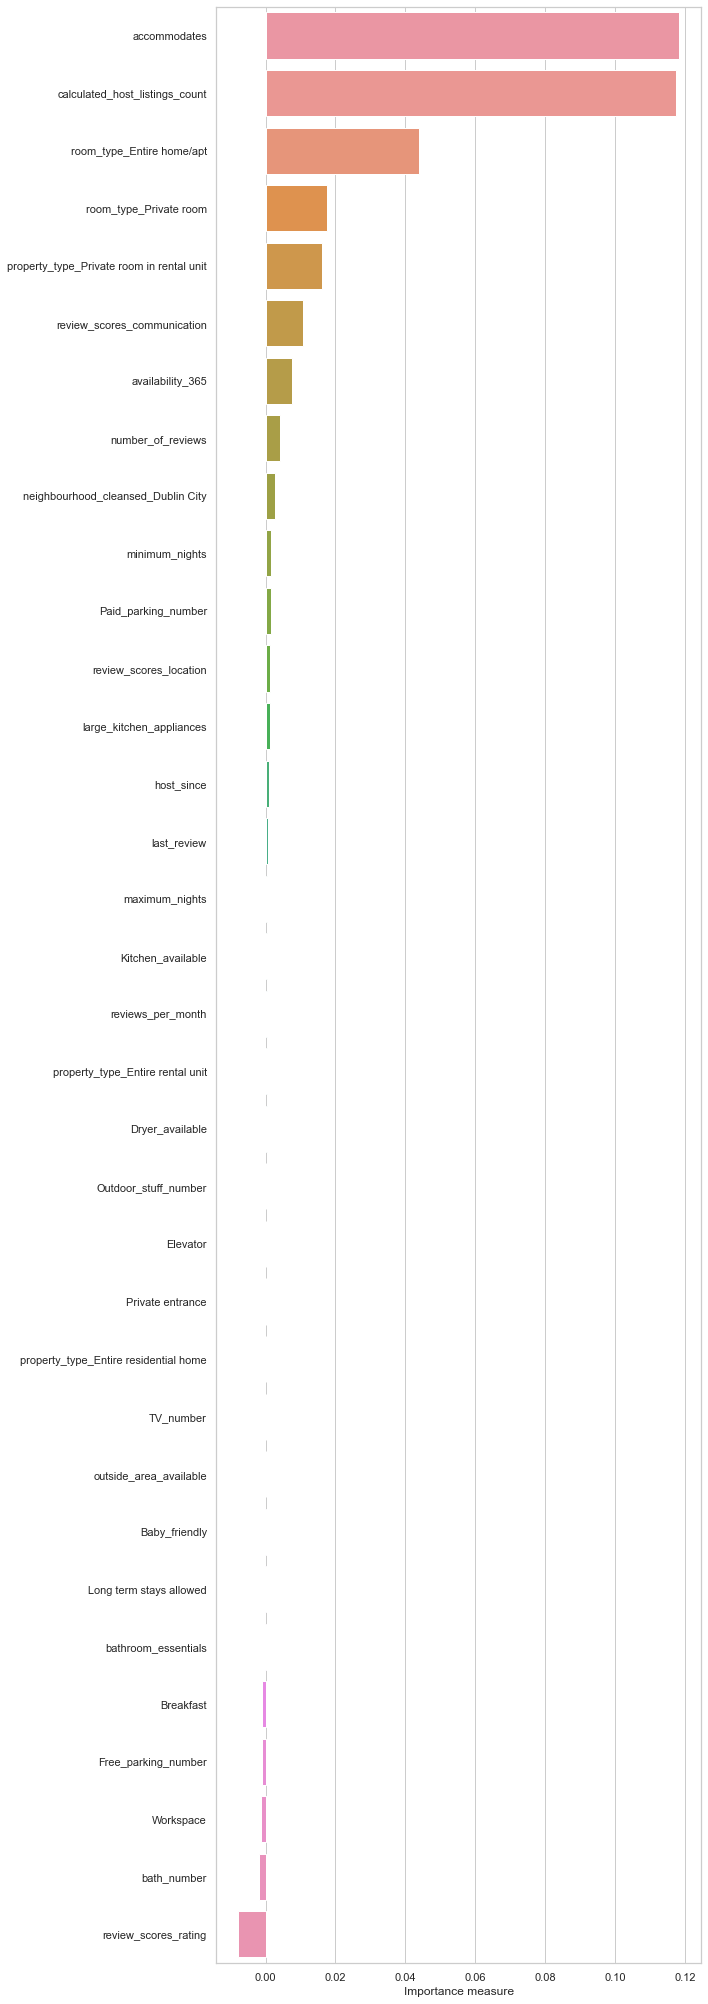

In [249]:
result = permutation_importance(reg, X_test, y_test, n_repeats=n_repeats, random_state=42)
lm_importances = pd.Series(result.importances_mean, index=listings_compl.columns)
# sort the features by their importance
plot_data = lm_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

## Ridge with Kernel model
Let's repeat the permutation approach for several other algorithms

### rbf kernel

In [250]:
# train Ridge Kernel model
rbf_ridge = KernelRidge(kernel = "rbf", alpha = 0)
rbf_ridge.fit(X_train, y_train)
rbf_ridge.score(X_test, y_test)

-0.1493828234307757

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/2830413365.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


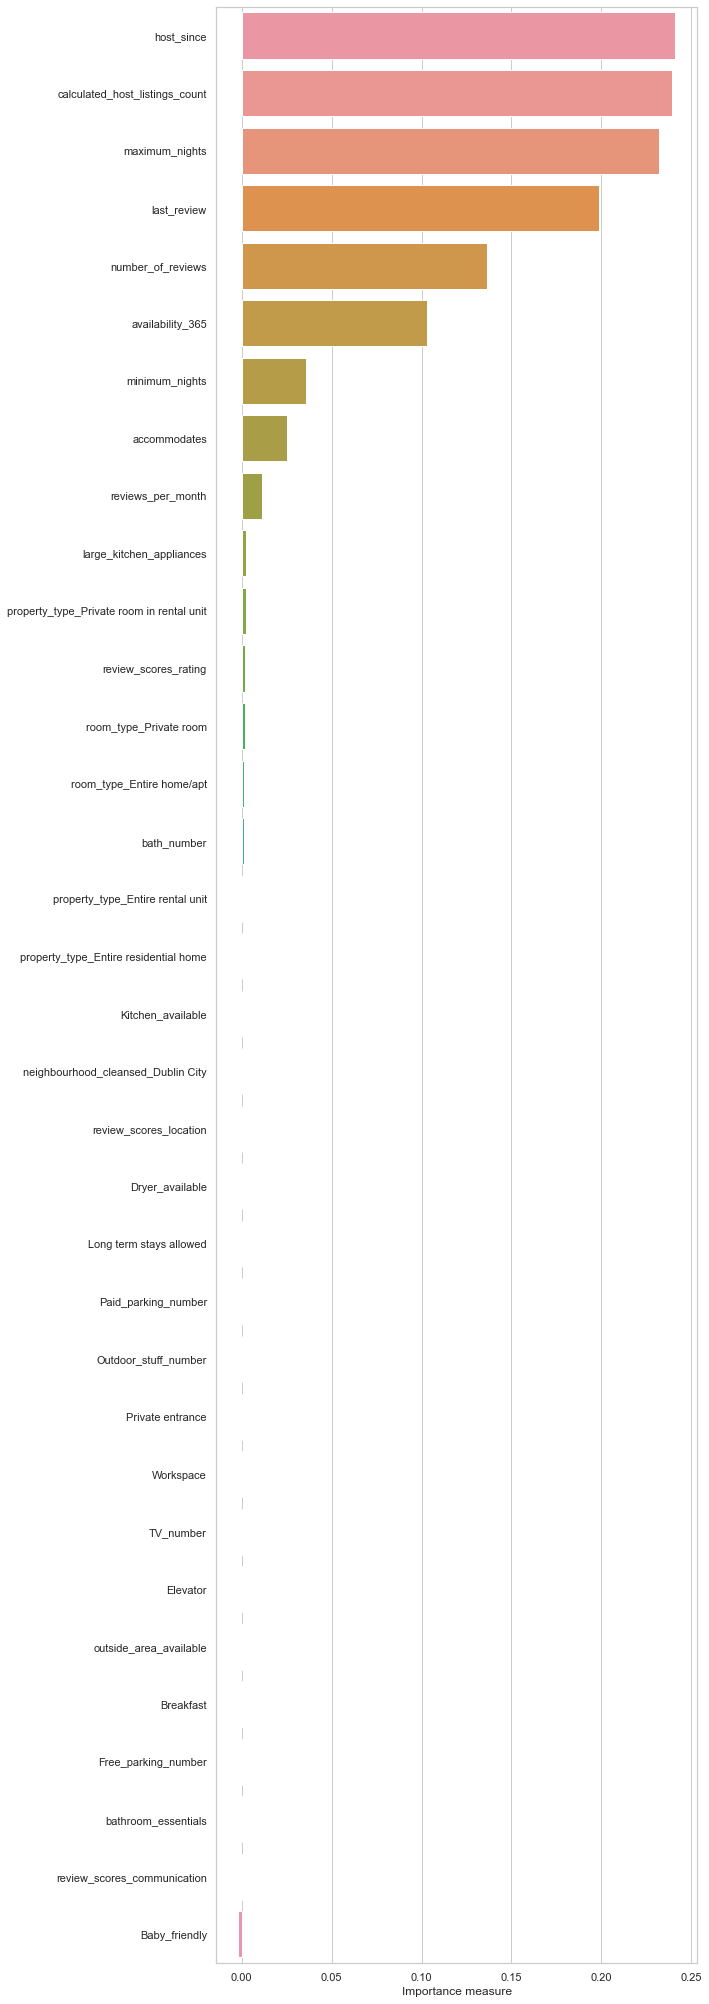

In [251]:
result = permutation_importance(rbf_ridge, X_test, y_test, n_repeats=n_repeats, random_state=42)
rbf_ridge_importances = pd.Series(result.importances_mean, index=listings_compl.columns)
# sort the features by their importance
plot_data = rbf_ridge_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

### linear kernel

In [252]:
# train Ridge Kernel model
linear_ridge = KernelRidge(kernel = "linear")
linear_ridge.fit(X_train, y_train)
linear_ridge.score(X_test, y_test)

0.17801224143427308

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/4222484363.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


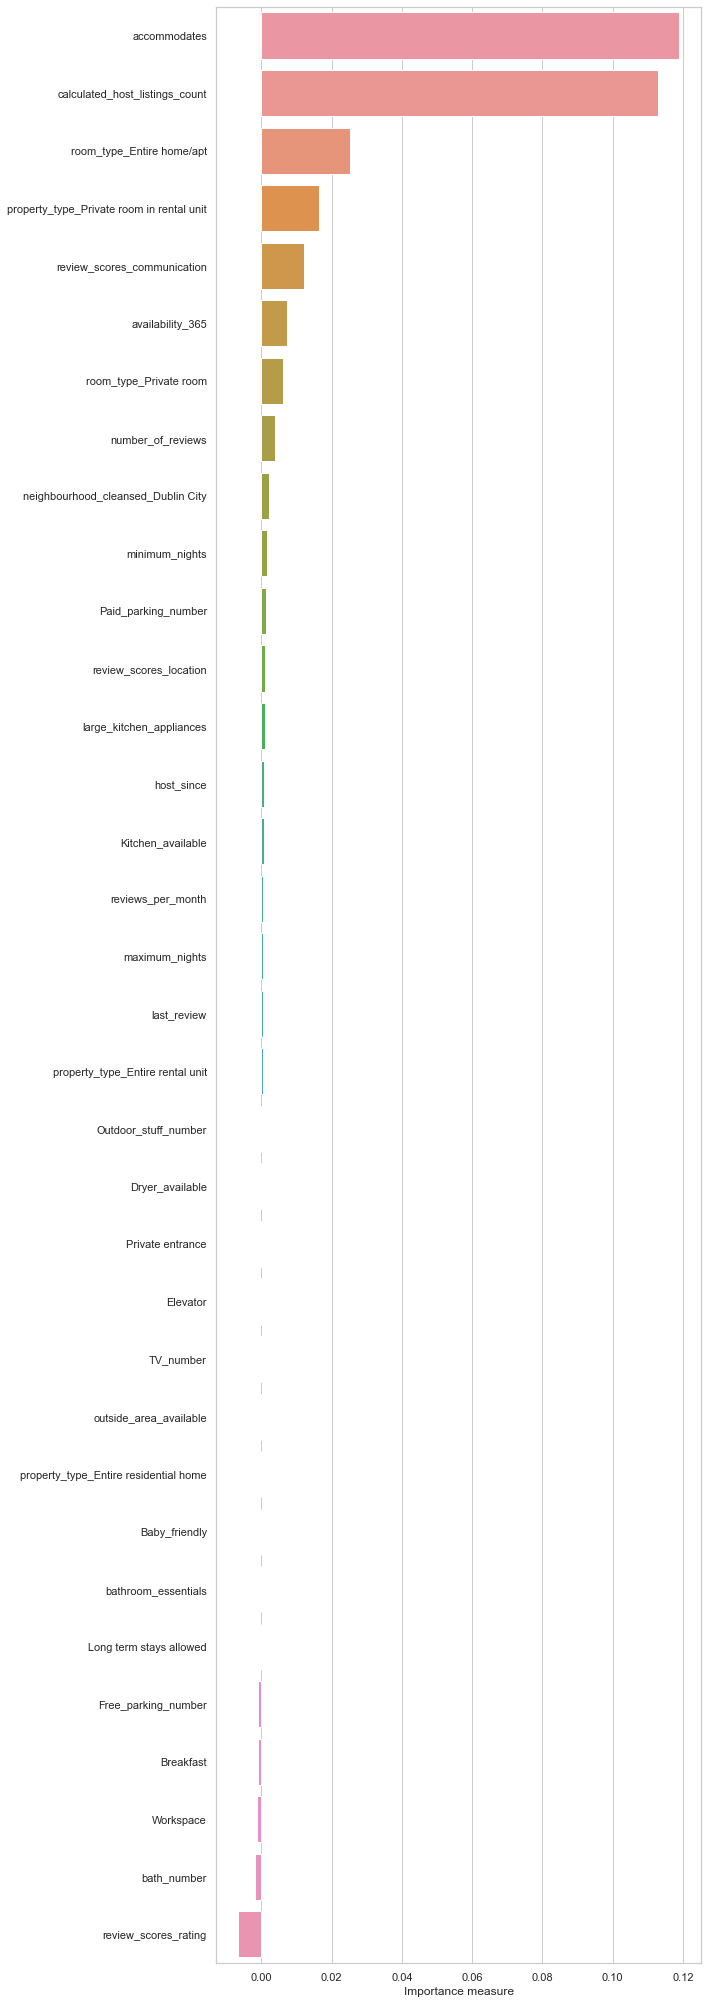

In [253]:
result = permutation_importance(linear_ridge, X_test, y_test, n_repeats=n_repeats, random_state=42)
linear_ridge_importances = pd.Series(result.importances_mean, index=listings_compl.columns)
# sort the features by their importance
plot_data = linear_ridge_importances.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

## Boosting

In [254]:
params = {
    "n_estimators": 200,
    "max_depth": 2,
    "min_samples_split": 10,
    "learning_rate": 0.1,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.37263850107749663

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_45588/1496711808.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


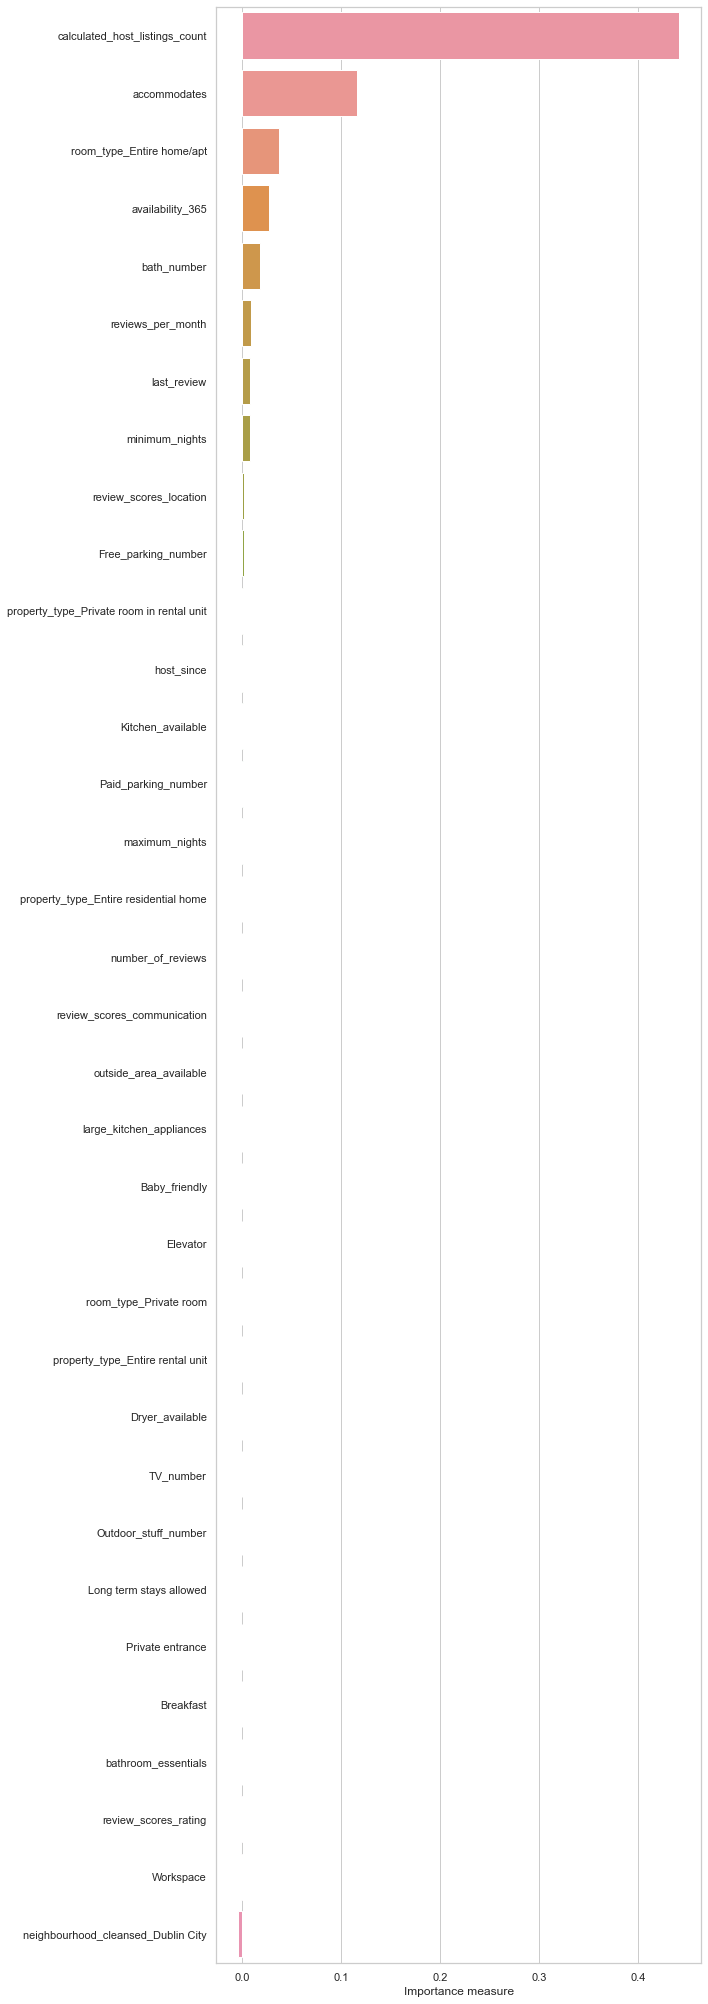

In [255]:
result = permutation_importance(reg, X_test, y_test, n_repeats=n_repeats, random_state=42, scoring = "r2")
boost_feature_importance = pd.Series(result.importances_mean, index=listings_compl.columns)
# sort the features by their importance
plot_data = boost_feature_importance.sort_values(ascending=False)

# plotting
sn.set_theme(style = "whitegrid")
fig, ax = plt.subplots(figsize = (10,28))
sn.barplot(x=plot_data.values, y=plot_data.index)
ax.set_xlabel("Importance measure")
fig.tight_layout()
fig.show()

In [256]:
importances = pd.DataFrame({"Forest": forest_importances, "Linear Regression": lm_importances, "RBF Ridge": rbf_ridge_importances, "Linear Ridge": linear_ridge_importances, "Boosting": boost_feature_importance})

In [257]:
importances

,Forest,Linear Regression,RBF Ridge,Linear Ridge,Boosting
Breakfast,-0.000116,-0.001028,-0.000265,-0.000977,-0.000127
Elevator,0.000870,0.000143,-0.000149,0.000089,0.000000
Long term stays allowed,0.000303,-0.000123,0.000120,-0.000076,0.000000
Private entrance,0.000243,0.000094,-0.000038,0.000115,-0.000015
Workspace,-0.000827,-0.001216,-0.000057,-0.001119,-0.000846
Dryer_available,-0.000256,0.000263,0.000268,0.000197,0.000000
Kitchen_available,0.001844,0.000516,0.000474,0.000656,0.000716
neighbourhood_cleansed_Dublin City,-0.000204,0.002655,0.000451,0.002227,-0.003572
property_type_Entire rental unit,0.002782,0.000483,0.000709,0.000419,0.000000
property_type_Entire residential home,0.005776,0.000091,0.000487,0.000025,0.000328


In [258]:
importances.mean(axis = 1).sort_values(ascending=False)

calculated_host_listings_count               0.226762
accommodates                                 0.086634
host_since                                   0.050915
maximum_nights                               0.048228
last_review                                  0.043211
availability_365                             0.032786
number_of_reviews                            0.030327
room_type_Entire home/apt                    0.029820
minimum_nights                               0.011887
room_type_Private room                       0.009626
property_type_Private room in rental unit    0.009458
bath_number                                  0.005794
review_scores_communication                  0.005015
reviews_per_month                            0.004918
review_scores_location                       0.001436
Paid_parking_number                          0.001435
property_type_Entire residential home        0.001341
large_kitchen_appliances                     0.001176
property_type_Entire rental 